**Analyzing U.S. COVID-19 Data**

# Project Documentation

## 1. Project Structure

### File Hierarchy

- **data.csv**: Dataset containing COVID-19 Case Surveillance data.
- **pulse_puf_most_recent**: Dataset containing Household Pulse Survey:.
- **Statistical_inference_Final_Project.ipynb**: Colab notebook for analysis.

### General Flow

1. **Data Loading**: Load the dataset and perform initial data exploration.
2. **Data Cleaning**: Clean and preprocess the data for analysis.
3. **Analysis**: Perform statistical analysis and modeling.
4. **Results**: Summarize findings and conclusions.

## 2. Functions Description and Usage

### `load_data(file_path, columns, nrows)`

- **Description**: Loads a CSV dataset with specified columns and number of rows.
- **Parameters**:
  - `file_path`: File path to the dataset.
  - `columns`: List of columns to load.
  - `nrows`: Number of rows to read.
- **Returns**: Pandas DataFrame containing the loaded data.

### `clean_data(df)`

- **Description**: Cleans and preprocesses the loaded dataset.
- **Parameters**:
  - `df`: Pandas DataFrame containing the loaded data.
- **Returns**: Cleaned Pandas DataFrame ready for analysis.

### `analyze_data(df)`

- **Description**: Performs statistical analysis on the cleaned dataset.
- **Parameters**:
  - `df`: Pandas DataFrame containing the cleaned data.
- **Returns**: Summary of the analysis results.

## 3. Data Collection and Cleaning Steps

1. **Data Collection**:
   - Loaded the dataset from `data.csv`.
   - Selected relevant columns (`age_group`, `death_yn`, `sex`, `race`).
   - Limited the dataset to 1,000,000 rows.

2. **Data Cleaning**:
   - Removed duplicates and missing values.
   - Standardized column names.
   - Converted data types as needed.

## 4. Analysis Requirements

- **Statistical Analysis**:
  - Investigated relationships between `age_group`, `sex`, `race`, and `death_yn`.
  - Calculated death rates by demographic factors.

## 5. Challenges, Limitations, Assumptions

- **Challenges**:
  - Handling large dataset size (1,000,000 rows).
  - Dealing with missing values and data inconsistencies.

- **Limitations**:
  - Assumes the dataset is representative of the entire population.
  - Limited to the variables available in the dataset.

- **Assumptions**:
  - Assumes the dataset is accurate and up-to-date.
  - Assumes data preprocessing adequately cleans the dataset.

---



**Imports:**

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the data:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1_path = '/content/drive/Shareddrives/The_Maze /data.csv'
df1 = pd.read_csv(data1_path)
# data2_path = '/content/drive/Shareddrives/The_Maze /pulse_puf_most_recent.csv'
# df2 = pd.read_csv(data2_path)

<ipython-input-5-53f6c3eaf85c>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(data1_path)


In [ ]:
df1.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2022-02,MI,26.0,OAKLAND,26125.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2022-01,CA,6.0,LOS ANGELES,6037.0,18 to 49 years,Male,Unknown,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Missing,NaN
3,2022-01,NV,32.0,CLARK,32003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-05,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


# **PART 1: Exploratory Analysis:**

## 1. The total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.

#### Extracted relevant columns ('case_month', 'hosp_yn', 'death_yn') from the dataset. Aggregated data to calculate total hospitalizations and deaths per month-year timestamp. Visualized the trend of total hospitalizations and deaths over time using a line plot.

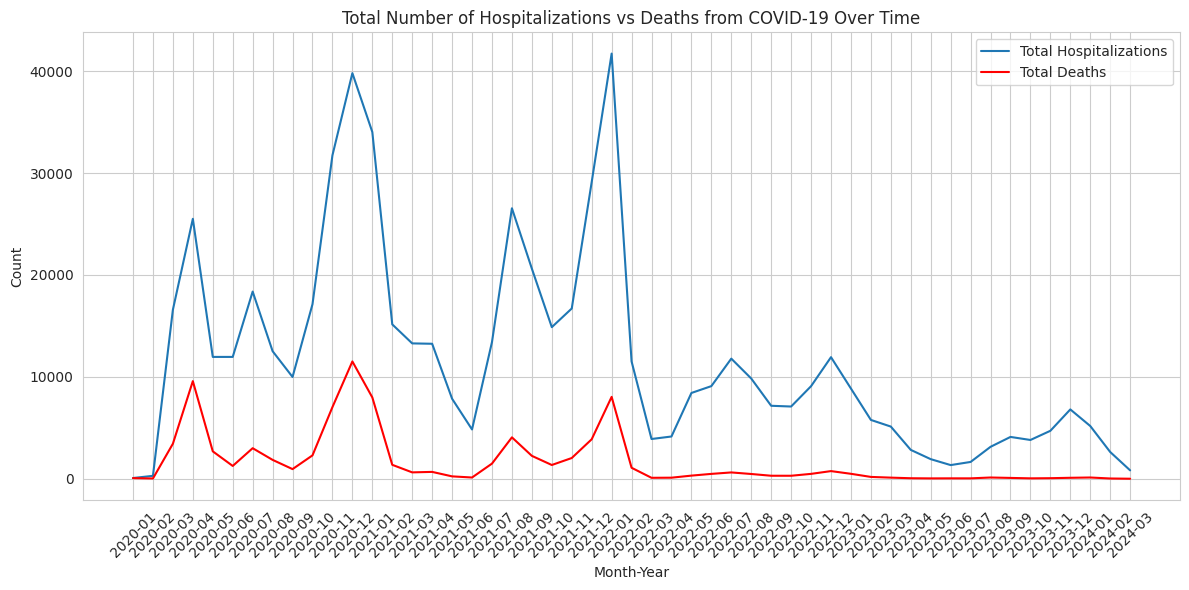

In [ ]:
# Create a new DataFrame with only the required columns
df_hosp_death = df1[['case_month', 'hosp_yn', 'death_yn']]

# Aggregate the data to get the total number of hospitalizations and deaths per month-year
summary_df = df_hosp_death.groupby('case_month').agg(
    total_hospitalizations=pd.NamedAgg(column='hosp_yn', aggfunc=lambda x: (x == 'Yes').sum()),
    total_deaths=pd.NamedAgg(column='death_yn', aggfunc=lambda x: (x == 'Yes').sum())
).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(summary_df['case_month'], summary_df['total_hospitalizations'], label='Total Hospitalizations')
plt.plot(summary_df['case_month'], summary_df['total_deaths'], label='Total Deaths', color='red')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Total Number of Hospitalizations vs Deaths from COVID-19 Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. The average rates of COVID-related deaths relative to patient demographic.

#### Created a DataFrame (df_demographics) containing only the relevant columns: 'death_yn', 'age_group', 'sex', and 'race'. Defined a function to calculate the death rate for each demographic group. Calculated the average death rate by age group, sex, and race using the defined function. Visualized the average COVID-related death rate by age group using a bar plot, with data labels added to each bar for clarity.

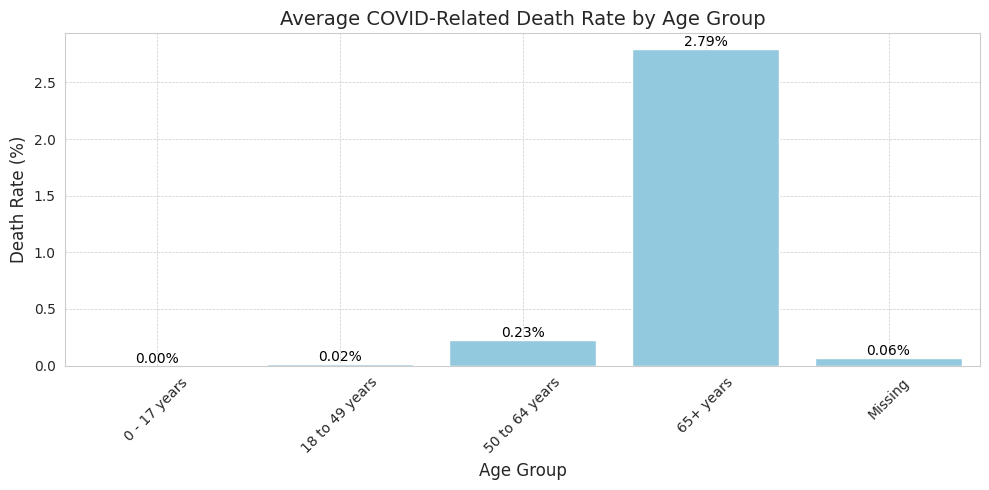

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a new DataFrame with only the required columns
df_demographics = df1[['death_yn', 'age_group', 'sex', 'race']]

# Function to calculate death rate
def calculate_death_rate(group):
    return (group == 'Yes').mean() * 100

# Calculate the average death rate by age group
age_group_death_rate = df_demographics.groupby('age_group')['death_yn'].agg(death_rate=calculate_death_rate).reset_index()

# Calculate the average death rate by sex
sex_death_rate = df_demographics.groupby('sex')['death_yn'].agg(death_rate=calculate_death_rate).reset_index()

# Calculate the average death rate by race
race_death_rate = df_demographics.groupby('race')['death_yn'].agg(death_rate=calculate_death_rate).reset_index()

# Create a bar plot for death rate by age group
plt.figure(figsize=(10, 5))
sns.barplot(data=age_group_death_rate, x='age_group', y='death_rate', color='skyblue')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Death Rate (%)', fontsize=12)
plt.title('Average COVID-Related Death Rate by Age Group', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)

# Add data labels on the bars
for index, row in age_group_death_rate.iterrows():
    plt.text(index, row.death_rate, f'{row.death_rate:.2f}%', color='black', ha="center", fontsize=10, va='bottom')

plt.tight_layout()
plt.show()


#### Filtered out 'Unknown' and 'Missing' values from sex_death_rate data. Created a bar plot showing the average COVID-related death rate by sex. Data labels were added to each bar for clarity.

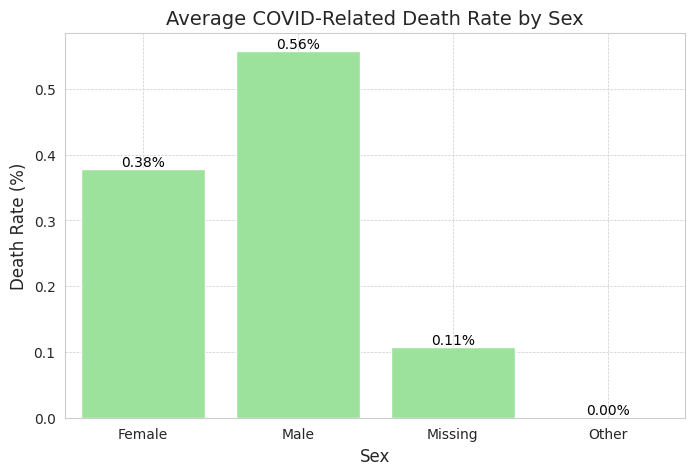

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out 'Unknown' and 'Missing' values from sex_death_rate
sex_death_rate_filtered = sex_death_rate[(sex_death_rate['sex'] != 'Unknown')]

# Create a bar plot for death rate by sex
plt.figure(figsize=(8, 5))
sns.barplot(data=sex_death_rate_filtered, x='sex', y='death_rate', color='lightgreen')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Death Rate (%)', fontsize=12)
plt.title('Average COVID-Related Death Rate by Sex', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)

# Add data labels on the bars
for index, row in sex_death_rate_filtered.iterrows():
    plt.text(index, row.death_rate, f'{row.death_rate:.2f}%', color='black', ha="center", fontsize=10, va='bottom', rotation=0)

#plt.tight_layout()
plt.show()


#### Mapped long race names to shorter versions for better visualization. Created a bar plot illustrating the average COVID-related death rate by race. The 'Unknown' and 'Missing' categories were replaced with 'NA' for consistency.

<ipython-input-33-04e44487ce37>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_death_rate_filtered['race'] = race_death_rate_filtered['race'].map(race_name_mapping)


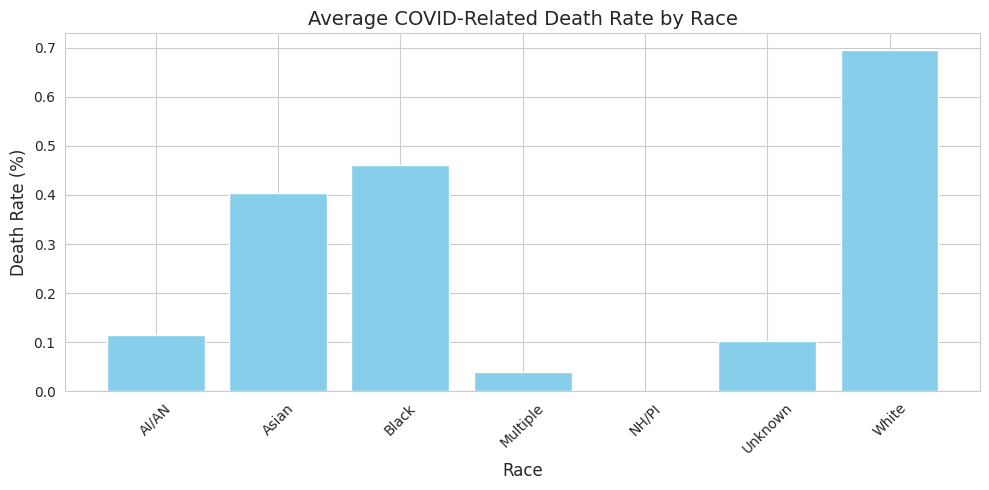

In [ ]:
import matplotlib.pyplot as plt

# Mapping long race names to shorter versions
race_name_mapping = {
    "American Indian/Alaska Native": "AI/AN",
    "Asian": "Asian",
    "Black": "Black",
    "Multiple/Other": "Multiple",
    "Native Hawaiian/Other Pacific Islander": "NH/PI",
    "White": "White",
    "Unknown": "Unknown",
    "Missing": "Missing",
    "NA, if value suppressed for privacy protection": "NA"
}

# Replace long race names with shorter versions
race_death_rate_filtered['race'] = race_death_rate_filtered['race'].map(race_name_mapping)

# Create a bar plot for death rate by race
plt.figure(figsize=(10, 5))
plt.bar(race_death_rate_filtered['race'], race_death_rate_filtered['death_rate'], color='skyblue')
plt.xlabel('Race', fontsize=12)
plt.ylabel('Death Rate (%)', fontsize=12)
plt.title('Average COVID-Related Death Rate by Race', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


##3. The rates of COVID-related hospitalization and death with age (across age groups).

#### Cleaned the data by replacing 'Unknown' and 'Missing' values with NA for hospitalization and death columns. Grouped the data by age group to calculate hospitalization and death rates. Plotted the COVID-19 hospitalization and death rates by age group using a line plot. Provided visual representation of hospitalization and death rates across different age groups, aiding in understanding COVID-19 severity among various age demographics.

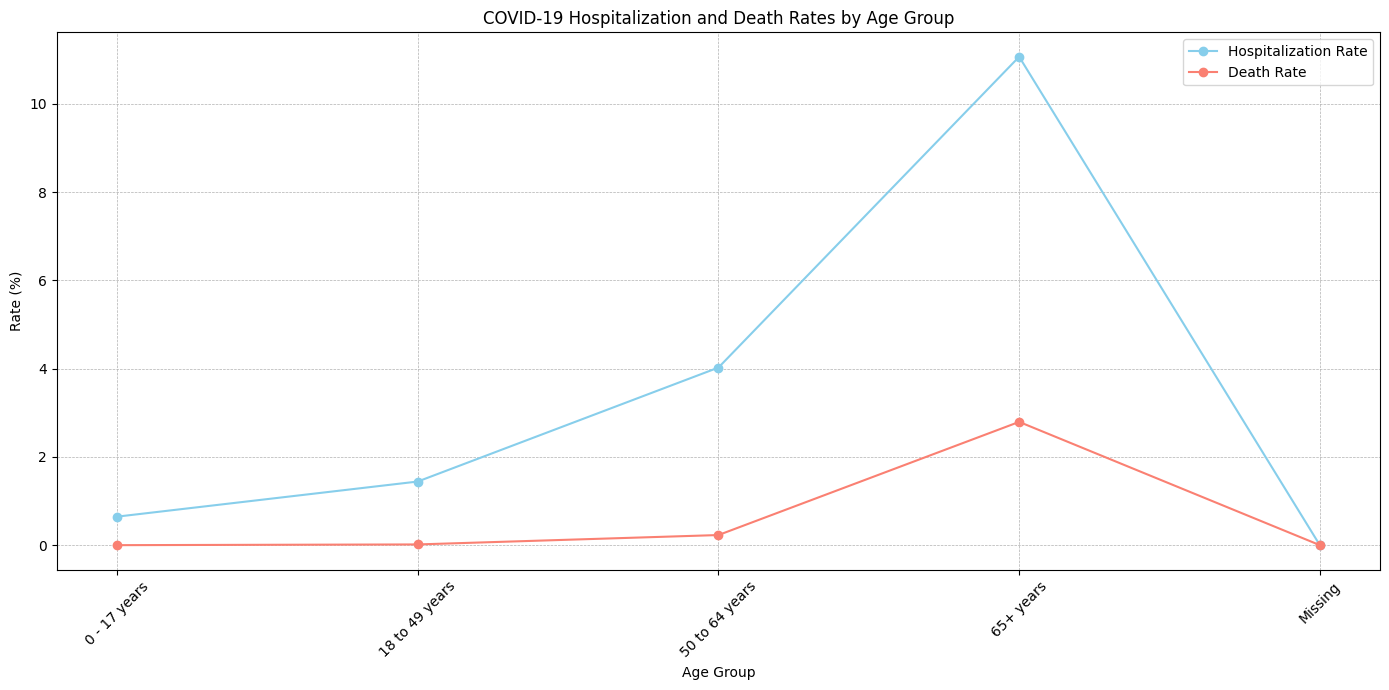

In [ ]:
import matplotlib.pyplot as plt

# Clean the data
df1['hosp_yn'] = df1['hosp_yn'].replace(['Unknown', 'Missing'], pd.NA)
df1['death_yn'] = df1['death_yn'].replace(['Unknown', 'Missing', 'NA'], pd.NA)

# Group by age group
age_groups = df1.groupby('age_group')

# Initialize lists to store results
age_groups_list = []
hospitalization_rates = []
death_rates = []

# Calculate hospitalization and death rates
for group, subset in age_groups:
    total_cases = subset.shape[0]
    hospitalized_cases = subset['hosp_yn'].value_counts().get('Yes', 0)
    death_cases = subset['death_yn'].value_counts().get('Yes', 0)

    hospitalization_rate = (hospitalized_cases / total_cases) * 100 if total_cases else 0
    death_rate = (death_cases / total_cases) * 100 if total_cases else 0

    age_groups_list.append(group)
    hospitalization_rates.append(hospitalization_rate)
    death_rates.append(death_rate)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot Hospitalization Rates
plt.plot(age_groups_list, hospitalization_rates, marker='o', color='skyblue', label='Hospitalization Rate')

# Plot Death Rates
plt.plot(age_groups_list, death_rates, marker='o', color='salmon', label='Death Rate')

plt.title('COVID-19 Hospitalization and Death Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## 4- Average rate of COVID-related hospitalization and death per state over the entire study period.

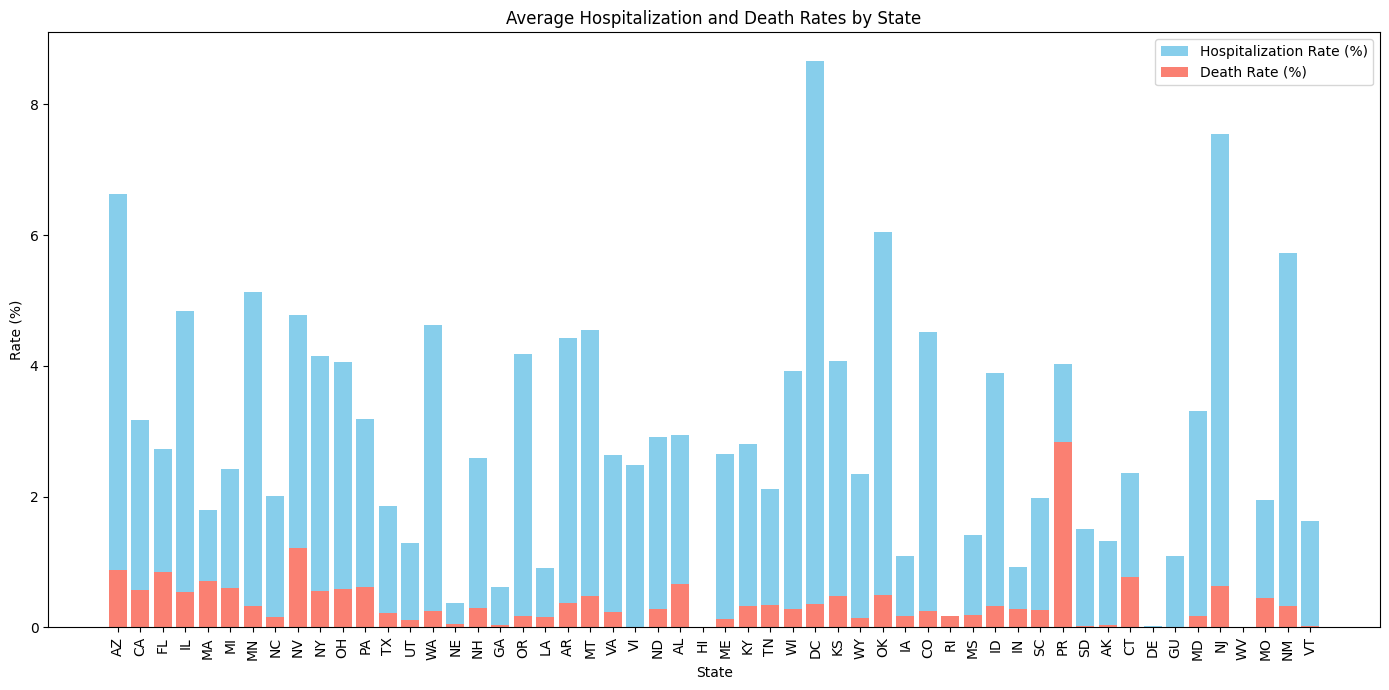

In [ ]:
import matplotlib.pyplot as plt

# Group by state
states = df1.groupby('res_state')

# Initialize dictionaries to store results
state_hospitalization_rates = {}
state_death_rates = {}

# Calculate hospitalization and death rates per state
for state, subset in states:
    total_cases = subset.shape[0]
    hospitalized_cases = subset['hosp_yn'].value_counts().get('Yes', 0)
    death_cases = subset['death_yn'].value_counts().get('Yes', 0)

    hospitalization_rate = (hospitalized_cases / total_cases) * 100 if total_cases else 0
    death_rate = (death_cases / total_cases) * 100 if total_cases else 0

    state_hospitalization_rates[state] = hospitalization_rate
    state_death_rates[state] = death_rate

# Plotting the results
fig, ax = plt.subplots(figsize=(14, 7))

# Plot Hospitalization Rates
ax.bar(state_hospitalization_rates.keys(), state_hospitalization_rates.values(), color='skyblue', label='Hospitalization Rate (%)')

# Plot Death Rates
ax.bar(state_death_rates.keys(), state_death_rates.values(), color='salmon', label='Death Rate (%)')

ax.set_title('Average Hospitalization and Death Rates by State')
ax.set_xlabel('State')
ax.set_ylabel('Rate (%)')
ax.tick_params(axis='x', rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


##5. The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.

#### Grouped the data by state to calculate average hospitalization and death rates. Calculated hospitalization and death rates per state over the entire study period. Plotted the average hospitalization and death rates by state using a bar chart. Provided visual representation of hospitalization and death rates across different state , facilitating comparison and identification of COVID-19 severity levels.

<ipython-input-6-40d8de359cbd>:19: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=df_icu_combined, x='age_group', y='icu_rate', hue='underlying_conditions_yn', palette='Set2', dodge=True, markers=['o', 's'], capsize=0.1, errwidth=1.5)


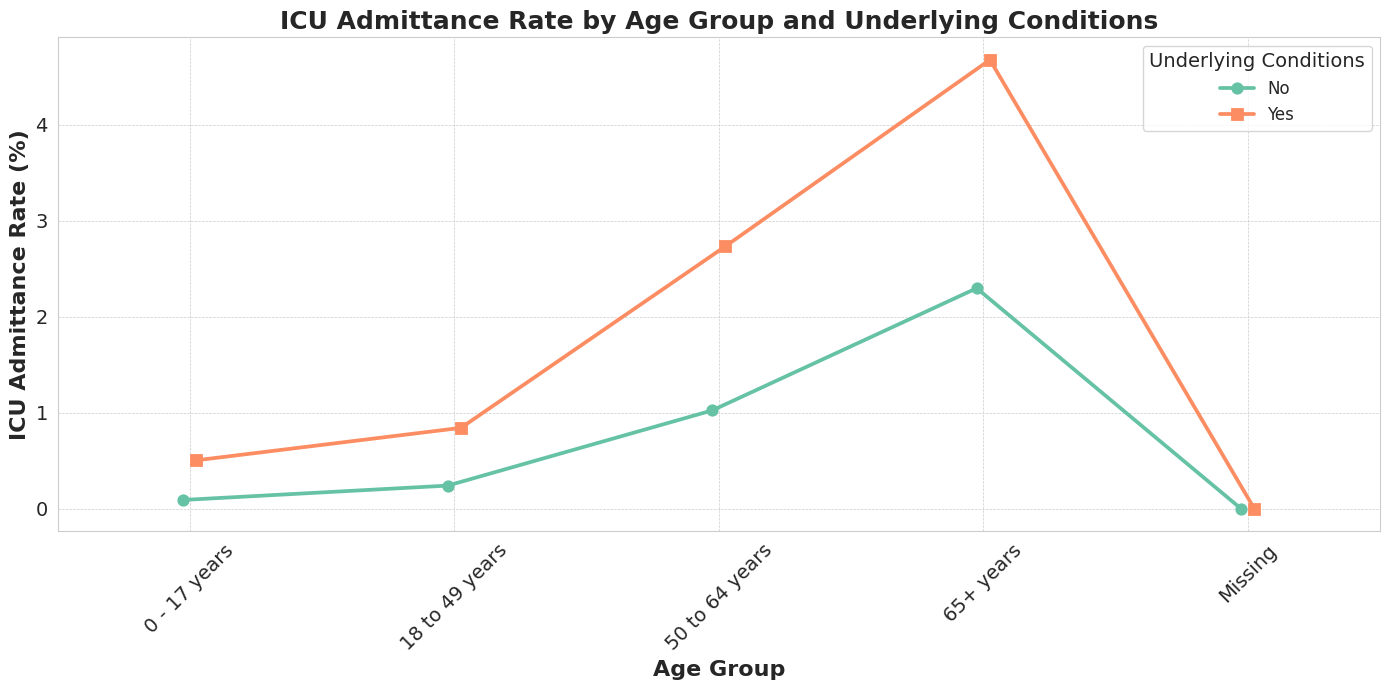

In [ ]:
# Create a new DataFrame with only the required columns
df_icu = df1[['icu_yn', 'age_group', 'underlying_conditions_yn']].copy()

# Convert categorical variables to category dtype
df_icu['age_group'] = df_icu['age_group'].astype('category')
df_icu['underlying_conditions_yn'] = df_icu['underlying_conditions_yn'].astype('category')
df_icu['icu_yn'] = df_icu['icu_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate ICU admittance rates by age group and underlying conditions
df_icu_combined = df_icu.groupby(['age_group', 'underlying_conditions_yn']).agg(
    icu_rate=pd.NamedAgg(column='icu_yn', aggfunc=lambda x: x.mean() * 100)
).reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a point plot for ICU admittance rate by age group and underlying conditions
plt.figure(figsize=(14, 7))
sns.pointplot(data=df_icu_combined, x='age_group', y='icu_rate', hue='underlying_conditions_yn', palette='Set2', dodge=True, markers=['o', 's'], capsize=0.1, errwidth=1.5)
plt.xlabel('Age Group', fontsize=16, fontweight='bold')
plt.ylabel('ICU Admittance Rate (%)', fontsize=16, fontweight='bold')
plt.title('ICU Admittance Rate by Age Group and Underlying Conditions', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Underlying Conditions', fontsize=12, title_fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## 6. The rate of expected employment loss due to COVID-19 and sector of employment.

#### Cleaned the data by replacing missing or unknown values with NA for 'wrkloss' and 'expctloss' columns. Replaced values in 'expctloss' with appropriate labels to enhance clarity. Grouped the data by sector of employment ('kindwork') to compute the rate of expected employment loss due to COVID-19. Presented the rates of expected employment loss across different sectors of employment, aiding in understanding the impact of COVID-19 on various employment sectors.

In [ ]:
# Clean the data by replacing missing or unknown values
df2['wrkloss'] = df2['wrkloss'].replace(['Unknown', 'Missing'], pd.NA)
df2['expctloss'] = df2['expctloss'].replace(['Unknown', 'Missing'], pd.NA)

# Replace the values in 'expctloss' with appropriate labels
df2['expctloss'] = df2['expctloss'].replace({
    '1': 'Yes',
    '2': 'No',
    '-99': 'Question seen but category not selected',
    '-88': 'Missing / Did not report'
})

# Initialize a dictionary to store results
expected_loss_rates = {}
group = df2.groupby('kindwork')
rates = {}

for category, subset in group:
    total_responses = subset.shape[0]
    expected_loss_cases = subset['expctloss'].value_counts().get('Yes', 0)
    expected_loss_rate = (expected_loss_cases / total_responses) * 100 if total_responses else 0
    rates[category] = expected_loss_rate

expected_loss_rates['kindwork'] = rates

del rates['-88']        # Missing / Did not report
del rates['-99']        # Question seen but category not selected

# Print the results
for demo, rates in expected_loss_rates.items():
    print(f"\nExpected Employment Loss Rates due to COVID-19 and sector of employment :")
    for category, rate in rates.items():
        print(f"{category}: {rate:.2f}%")


Expected Employment Loss Rates due to COVID-19 and sector of employment :
1: 19.70%
2: 24.23%
3: 22.00%
4: 39.85%
5: 29.57%


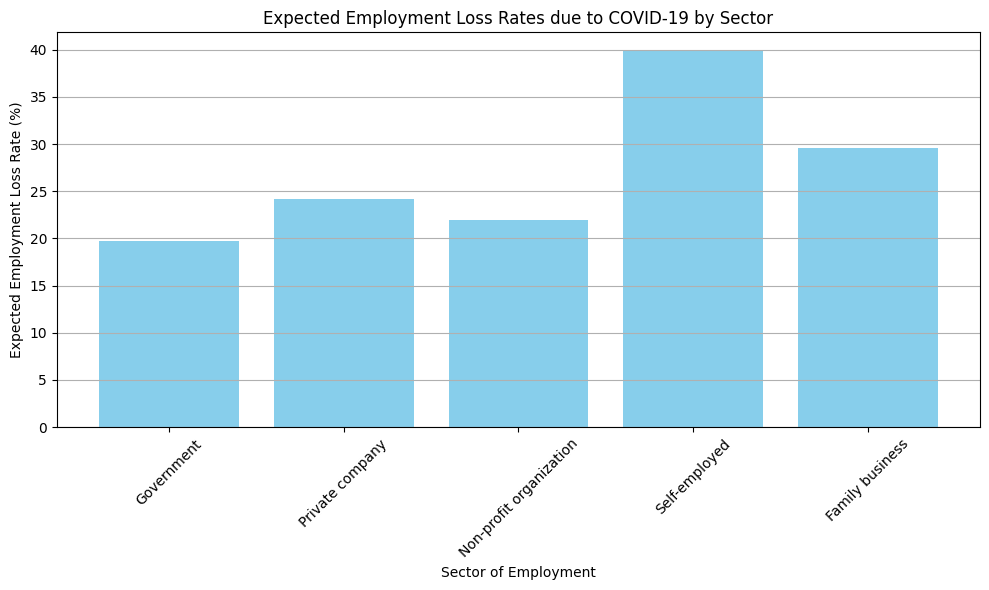

In [ ]:
# Plotting the results

sector_name_mapping = {
    '1': 'Government',
    '2': 'Private company',
    '3': 'Non-profit organization',
    '4': 'Self-employed',
    '5': 'Family business',
}

plt.figure(figsize=(10, 6))
plt.bar(rates.keys(), rates.values(), color='skyblue')
plt.xlabel('Sector of Employment')
plt.ylabel('Expected Employment Loss Rate (%)')
plt.title('Expected Employment Loss Rates due to COVID-19 by Sector')

plt.xticks(rotation=45)
plt.xticks(range(len(rates)), [sector_name_mapping.get(sector, sector) for sector in rates.keys()])

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 7. The rate of expected employment loss due to COVID-19 relative to responders demographics.

#### Cleaned the data by replacing missing or unknown values with NA for 'wrkloss' and 'expctloss' columns. Replaced values in 'expctloss' with appropriate labels for clarity. Calculated the expected employment loss rates by demographics (tbirth_year, egender, rrace). Visualized the rates of expected employment loss by demographics using bar plots, aiding in understanding the impact of COVID-19 on different demographic groups.


Expected Employment Loss Rates by tbirth_year:
1932: 10.15%
1933: 7.14%
1934: 6.93%
1935: 7.95%
1936: 8.30%
1937: 8.14%
1938: 8.22%
1939: 9.00%
1940: 9.33%
1941: 9.92%
1942: 11.28%
1943: 11.57%
1944: 12.46%
1945: 13.48%
1946: 14.03%
1947: 14.87%
1948: 15.69%
1949: 16.68%
1950: 18.34%
1951: 19.05%
1952: 20.07%
1953: 21.39%
1954: 22.02%
1955: 23.92%
1956: 25.65%
1957: 26.77%
1958: 28.60%
1959: 29.15%
1960: 30.37%
1961: 31.82%
1962: 31.68%
1963: 33.04%
1964: 33.14%
1965: 33.36%
1966: 34.11%
1967: 33.78%
1968: 34.24%
1969: 34.40%
1970: 33.55%
1971: 32.97%
1972: 33.29%
1973: 33.17%
1974: 32.44%
1975: 32.59%
1976: 31.50%
1977: 32.12%
1978: 32.24%
1979: 31.26%
1980: 31.35%
1981: 30.64%
1982: 30.74%
1983: 29.82%
1984: 29.32%
1985: 29.09%
1986: 30.01%
1987: 29.95%
1988: 30.24%
1989: 30.55%
1990: 31.44%
1991: 31.33%
1992: 32.49%
1993: 32.27%
1994: 32.38%
1995: 32.74%
1996: 33.90%
1997: 35.19%
1998: 35.55%
1999: 35.24%
2000: 33.42%
2001: 28.09%
2002: 23.97%

Expected Employment Loss Rates by ege

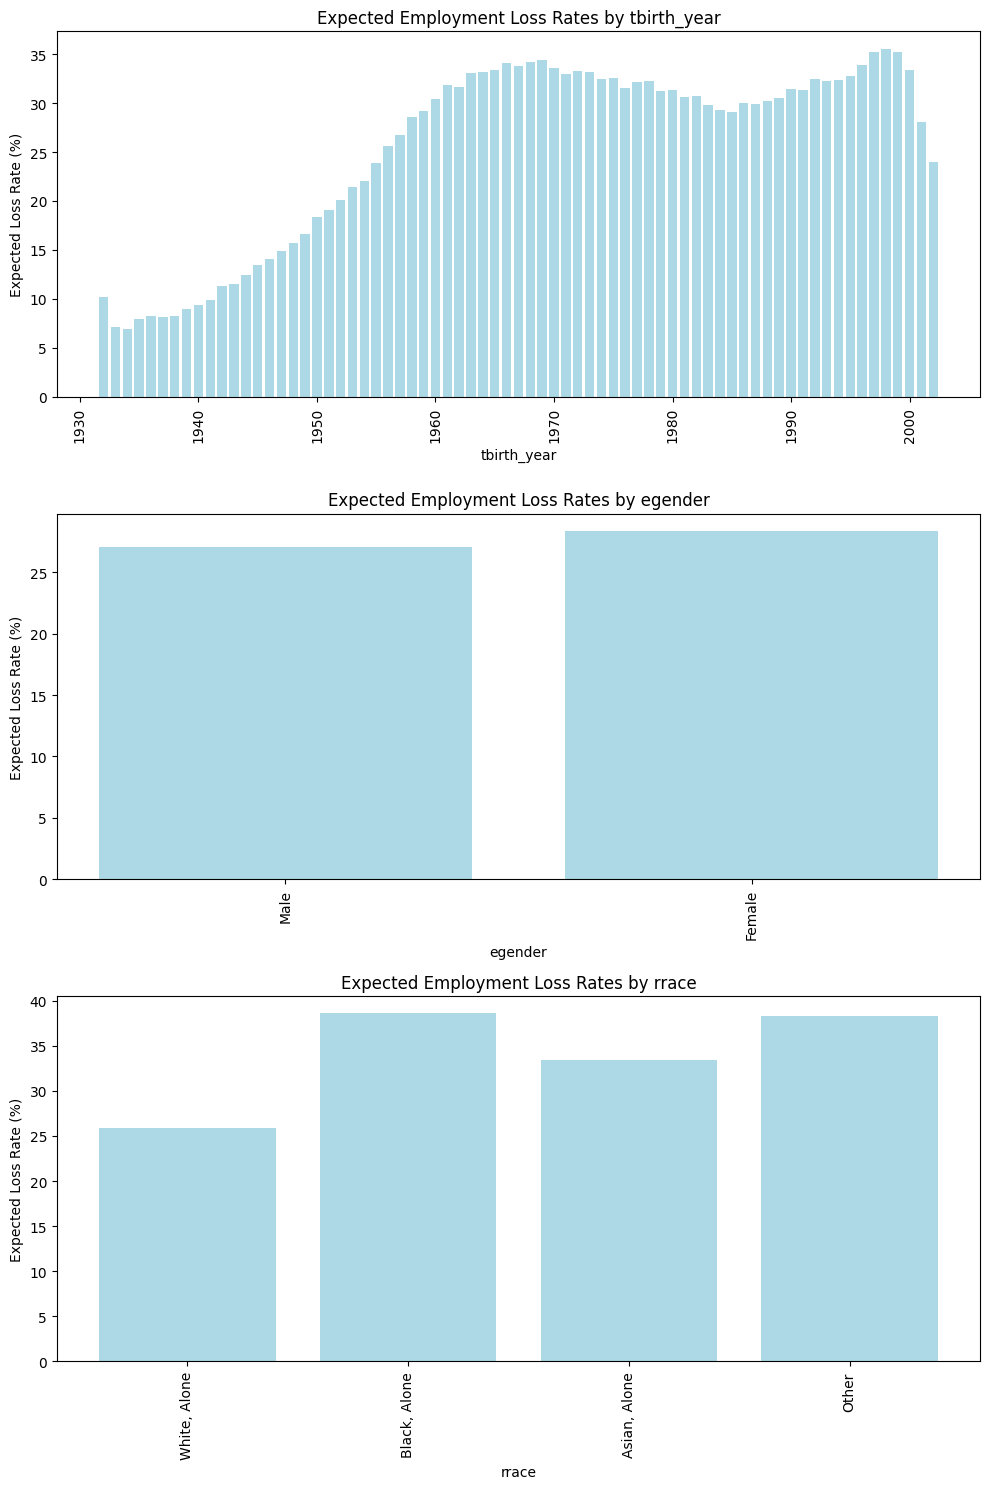

In [ ]:
# Clean the data by replacing missing or unknown values
df2['wrkloss'] = df2['wrkloss'].replace(['Unknown', 'Missing'], pd.NA)
df2['expctloss'] = df2['expctloss'].replace(['Unknown', 'Missing'], pd.NA)

# Replace the values in 'expctloss' with appropriate labels
df2['expctloss'] = df2['expctloss'].replace({
    '1': 'Yes',
    '2': 'No',
    '-99': 'Question seen but category not selected',
    '-88': 'Missing / Did not report'
})

# Demographics to group by
demographics = ['tbirth_year', 'egender', 'rrace']

# Initialize a dictionary to store results
expected_loss_rates = {}

# Naming maps for egender and rrace columns
egender_map = {
    '1': 'Male',
    '2': 'Female'
}

rrace_map = {
    '1': 'White, Alone',
    '2': 'Black, Alone',
    '3': 'Asian, Alone',
    '4': 'Other'
}

# Calculate expected employment loss rate by demographics
for demo in demographics:
    group = df2.groupby(demo)
    rates = {}

    for category, subset in group:
        total_responses = subset.shape[0]
        expected_loss_cases = subset['expctloss'].value_counts().get('Yes', 0)

        expected_loss_rate = (expected_loss_cases / total_responses) * 100 if total_responses else 0
        rates[category] = expected_loss_rate

    expected_loss_rates[demo] = rates

# Print the results
for demo, rates in expected_loss_rates.items():
    print(f"\nExpected Employment Loss Rates by {demo}:")
    for category, rate in rates.items():
        print(f"{category}: {rate:.2f}%")

# Plotting the results
fig, axs = plt.subplots(len(demographics), 1, figsize=(10, len(demographics) * 5))
for i, demo in enumerate(demographics):
    categories = list(expected_loss_rates[demo].keys())
    rates = list(expected_loss_rates[demo].values())

    # Use naming maps for x-axis labels
    if demo == 'egender':
        categories = [egender_map.get(category, 'Unknown') for category in categories]
    elif demo == 'rrace':
        categories = [rrace_map.get(category, 'Unknown') for category in categories]

    axs[i].bar(categories, rates, color='lightblue')
    axs[i].set_title(f'Expected Employment Loss Rates by {demo}')
    axs[i].set_xlabel(demo)
    axs[i].set_ylabel('Expected Loss Rate (%)')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


## 8. The rate of expected employment loss due to COVID-19 for the top 10 states with the highest rate of COVID hospitalization.

#### Cleaned the data by replacing missing or unknown values with NA for 'est_st' column. Identified the top 10 states with the highest COVID hospitalization rates. Filtered the data to include only respondents from the top 10 states. Calculated the expected employment loss rate due to COVID-19 for each of the top 10 states Provided the expected employment loss rates for the top 10 states, indicating the percentage of respondents expecting employment loss due to COVID-19 in each state.

In [ ]:
# Clean the data by replacing missing or unknown values
df2['est_st'] = df2['est_st'].replace(['Unknown', 'Missing'], pd.NA)

# Get the top 10 states with the highest COVID hospitalization rates
top_10_states = df1[df1['hosp_yn'] == 'Yes']['res_state'].value_counts().nlargest(10).index.tolist()
print(top_10_states)

state_mapping = {
    'CA': '06',
    'NY': '36',
    'NJ': '34',
    'IL': '17',
    'TX': '48',
    'AZ': '04',
    'FL': '12',
    'OH': '39',
    'PA': '42',
    'MN': '27',
}

top_10_states = list(state_mapping.values())
print(top_10_states)

# Filter data for the top 10 states


df2_top_10_states = df2[df2['est_st'].isin(top_10_states)]
df2_top_10_states.head()

# Initialize a dictionary to store results
expected_loss_rates_top_10_states = {}

# Calculate expected employment loss rate for the top 10 states
for state in top_10_states:
    subset = df2_top_10_states[df2_top_10_states['est_st'] == state]
    total_responses = subset.shape[0]
    expected_loss_cases = subset['expctloss'].value_counts().get('Yes', 0)

    expected_loss_rate = (expected_loss_cases / total_responses) * 100 if total_responses else 0
    expected_loss_rates_top_10_states[state] = expected_loss_rate


print(expected_loss_rates_top_10_states)

['CA', 'NY', 'NJ', 'IL', 'TX', 'AZ', 'FL', 'OH', 'PA', 'MN']
['06', '36', '34', '17', '48', '04', '12', '39', '42', '27']
{'06': 33.9065170734215, '36': 32.03961997170002, '34': 32.445899076742705, '17': 28.036787832941833, '48': 31.19158254553223, '04': 26.571964234208252, '12': 32.36575401214365, '39': 24.914232248674498, '42': 27.991461136736174, '27': 26.552217453505005}


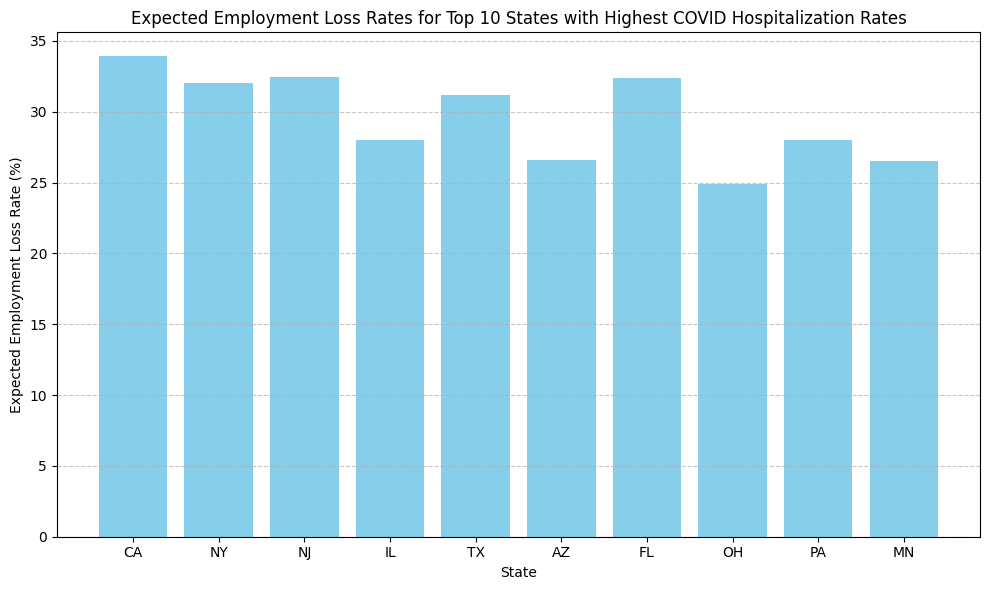

In [ ]:
# Plot the results

plt.figure(figsize=(10, 6))
plt.bar(state_mapping.keys(), expected_loss_rates_top_10_states.values(), color='skyblue')
plt.title('Expected Employment Loss Rates for Top 10 States with Highest COVID Hospitalization Rates')
plt.xlabel('State')
plt.ylabel('Expected Employment Loss Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 9. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise).

#### Cleaned the DataFrame by replacing invalid values ('-99', '-88') with NA for 'income' and 'delay' columns. Visualized the relationship between household income and the rate of delayed or unobtained medical treatment due to COVID. Utilized countplots to display the distribution of delayed or unobtained medical treatment responses across different income levels. Conducted a similar analysis for delayed or unobtained medical treatment not related to COVID. Provided visual representations of these relationships to assess potential correlations between household income and medical treatment accessibility.

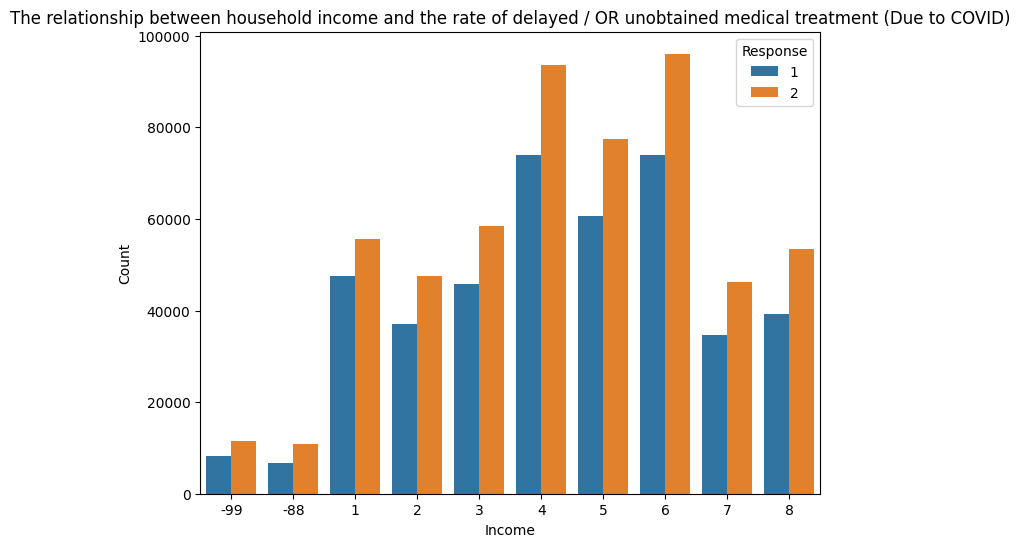

In [ ]:
# Clean the DataFrame
df2['income'] = df2['income'].replace(['-99', '-88'], pd.NA)
df2['delay'] = df2['delay'].replace(['-99', '-88'], pd.NA)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='income', hue='delay', data=df2)
plt.title('The relationship between household income and the rate of delayed / OR unobtained medical treatment (Due to COVID)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

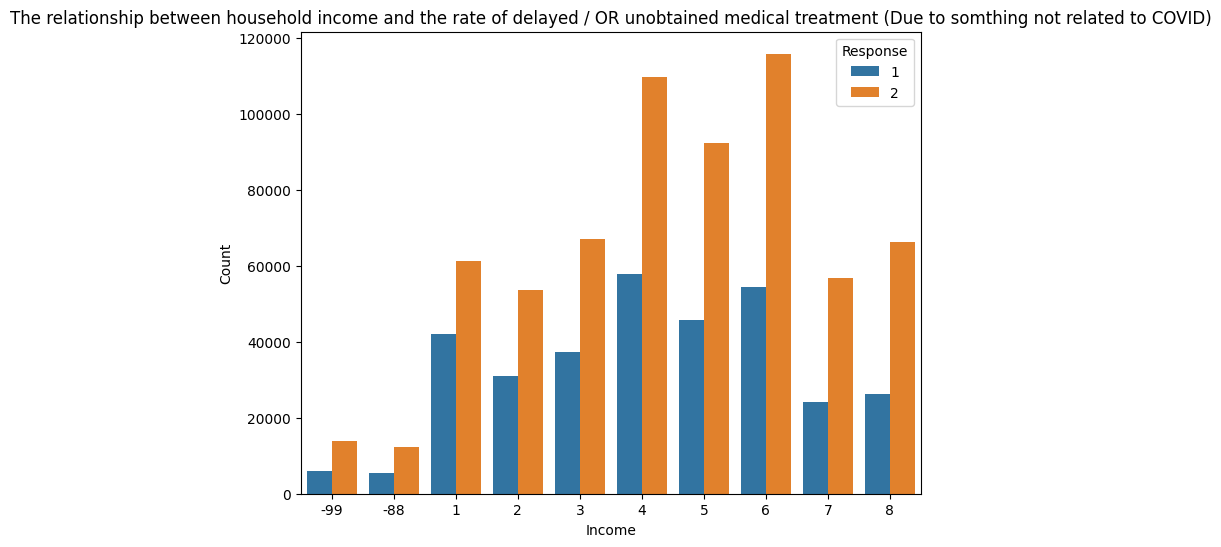

In [ ]:
# Clean the DataFrame
df2['income'] = df2['income'].replace(['-99', '-88'], pd.NA)
df2['notget'] = df2['notget'].replace(['-99', '-88'], pd.NA)


# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='income', hue='notget', data=df2)
plt.title('The relationship between household income and the rate of delayed / OR unobtained medical treatment (Due to somthing not related to COVID)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

## 10. The relationship between COVID-19 symptom manifestation and age group.

#### Cleaned the data by replacing missing or unknown values with NA for 'age_group' and 'symptom_status' columns. Visualized the relationship between COVID-19 symptom manifestation and age group using countplots. Examined the distribution of symptom manifestation responses across different age groups. Repeated the analysis using a subset of the data (first 10,000 rows) to enhance visualization clarity. Provided visual representations to assess the relationship between COVID-19 symptoms and age groups, aiding in understanding symptom manifestation patterns across different age

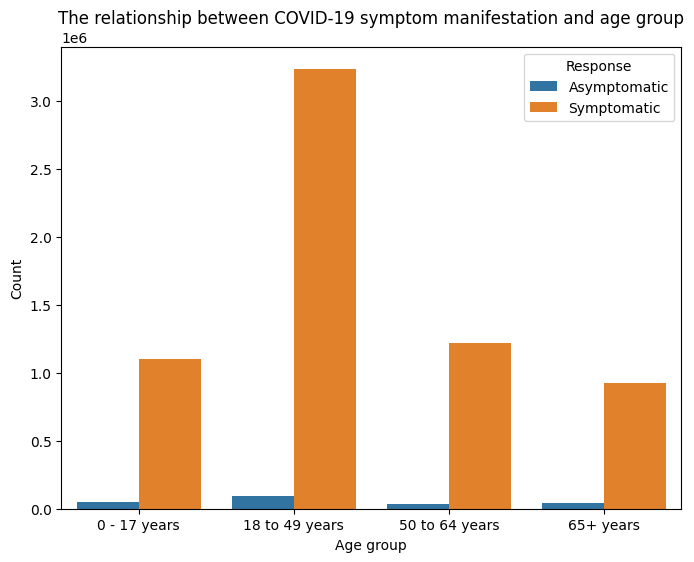

In [ ]:
# Clean the data by replacing missing or unknown values
df1['age_group'] = df1['age_group'].replace(['Unknown', 'Missing'], pd.NA)
df1['symptom_status'] = df1['symptom_status'].replace(['Unknown', 'Missing'], pd.NA)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='symptom_status', data=df1)
plt.title('The relationship between COVID-19 symptom manifestation and age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

<ipython-input-13-516559452046>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['age_group'] = subset_df['age_group'].replace(['Unknown', 'Missing'], pd.NA)
<ipython-input-13-516559452046>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['symptom_status'] = subset_df['symptom_status'].replace(['Unknown', 'Missing'], pd.NA)


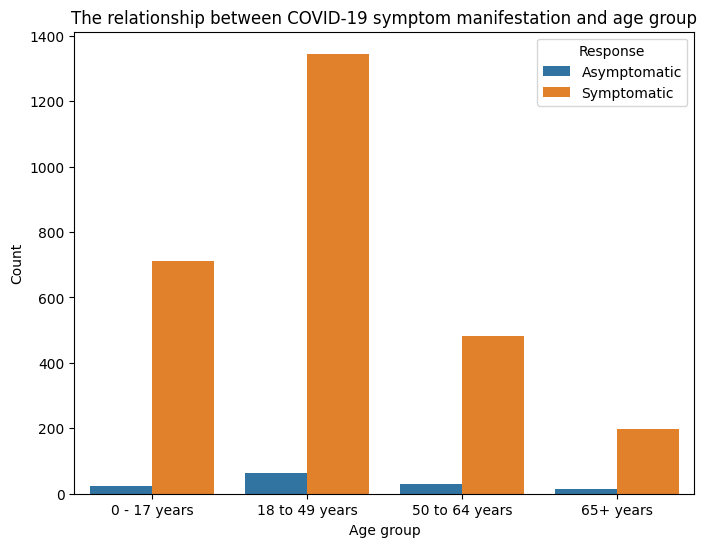

In [ ]:
# Using first 10000 rows
subset_df = df1.iloc[:10000]

# Clean the data by replacing missing or unknown values
subset_df['age_group'] = subset_df['age_group'].replace(['Unknown', 'Missing'], pd.NA)
subset_df['symptom_status'] = subset_df['symptom_status'].replace(['Unknown', 'Missing'], pd.NA)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='symptom_status', data=subset_df)
plt.title('The relationship between COVID-19 symptom manifestation and age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

# Part 2

 **2.1 Use the appropriate statistics and plots to answer the following
questions:**

## 1. Are hospitalized patients with underlying medical conditions and/or risk behaviors more likely to die from COVID-19?

<ipython-input-35-c68e2cb49d2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalized_data['has_underlying_condition'] = hospitalized_data['underlying_conditions_yn'] == 'Yes'


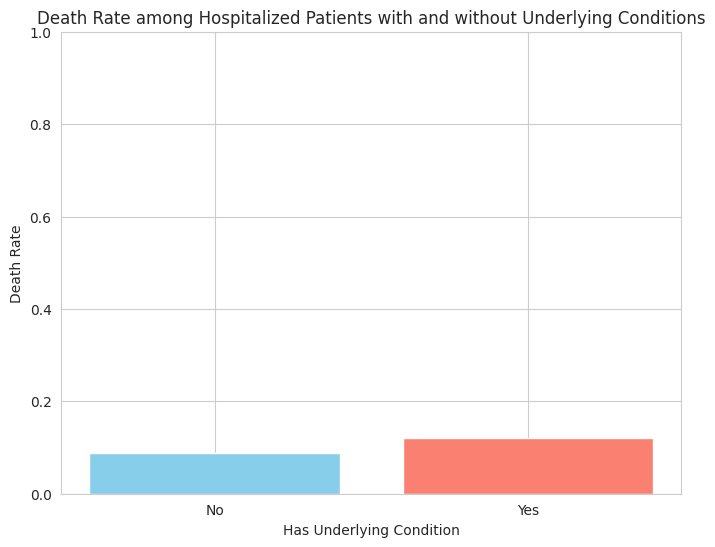

In [ ]:
# Filter the data for hospitalized patients
hospitalized_data = df1[df1['hosp_yn'] == 'Yes']

# Create a new column to indicate if a patient has any underlying condition
hospitalized_data['has_underlying_condition'] = hospitalized_data['underlying_conditions_yn'] == 'Yes'

# Group by the presence of underlying conditions and calculate death rate
death_rate_by_condition = hospitalized_data.groupby('has_underlying_condition')['death_yn'] \
                                           .value_counts(normalize=True)[:, 'Yes'] \
                                           .reset_index(name='death_rate')

# Set the order of underlying condition values
underlying_condition_order = ['No', 'Yes']

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(underlying_condition_order, death_rate_by_condition['death_rate'], color=['skyblue', 'salmon'])
plt.title('Death Rate among Hospitalized Patients with and without Underlying Conditions')
plt.xlabel('Has Underlying Condition')
plt.ylabel('Death Rate')
plt.ylim(0, 1)
plt.show()


## 2. Who are the people (the demographic segment) that appear to be most at risk of death due to COVID-19? Who is the least at risk?

Number of columns in DemographicFeatures_df: 4
Unique values in age_group column: ['18 to 49 years' '65+ years' '0 - 17 years' '50 to 64 years' nan
 'Missing']
Unique values in sex column: ['Female' 'Male' 'Unknown' nan 'Missing' 'Other']
Unique values in race column: ['Unknown' 'White' 'Missing' nan 'Black' 'Multiple/Other' 'Asian'
 'American Indian/Alaska Native' 'Native Hawaiian/Other Pacific Islander']
Unique values in death_yn column: ['No' 'Unknown' 'Missing' 'Yes' nan]


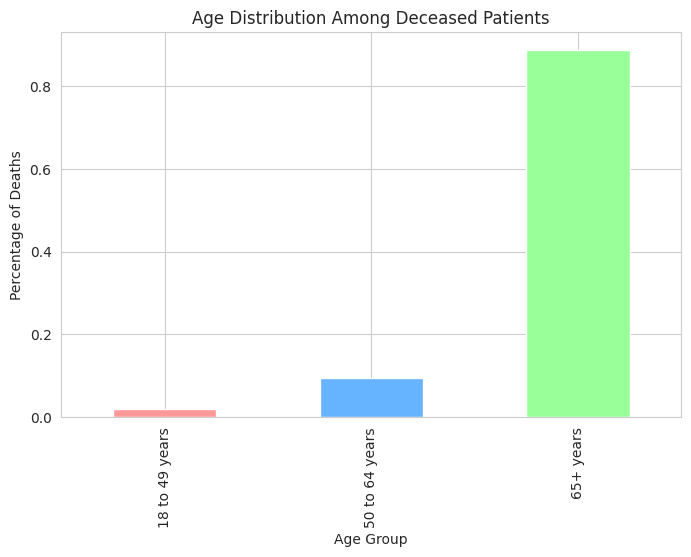

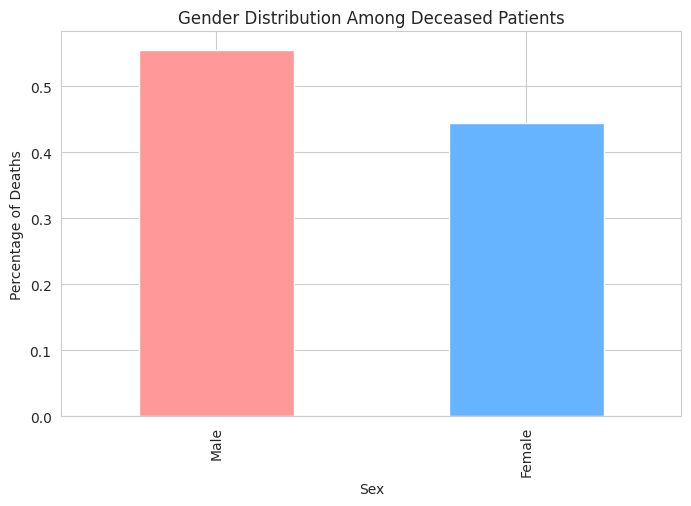

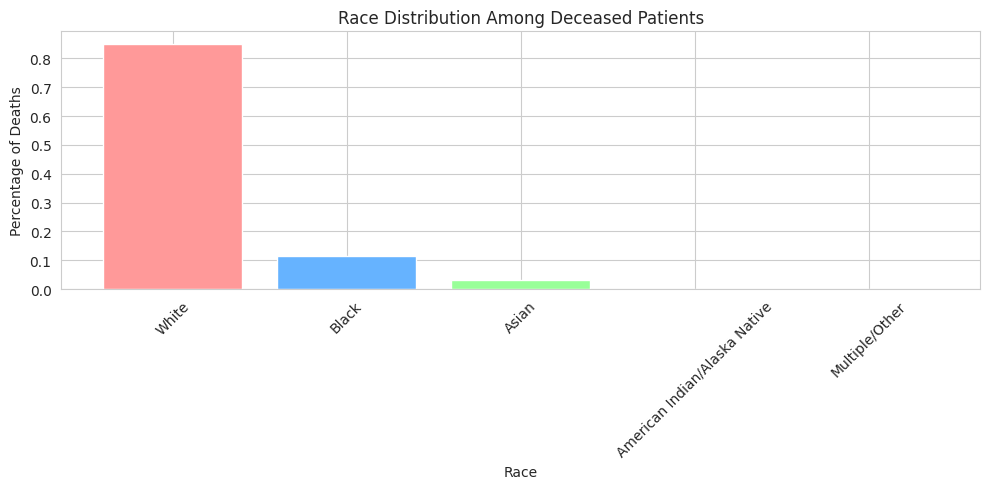

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant columns to create DemographicFeatures_df
DemographicFeatures_df = df1[['age_group', 'race', 'sex', 'death_yn']]

# Analyze age groups from DemographicFeatures_df
age_group_data = DemographicFeatures_df[DemographicFeatures_df['age_group'] != 'Missing']
age_group_data = age_group_data[age_group_data['death_yn'] == "Yes"]

# Calculate the normalized counts of each age group
age_group_counts = age_group_data['age_group'].value_counts(normalize=True).sort_index()

# Plot the age group distribution
plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.xlabel('Age Group')
plt.ylabel('Percentage of Deaths')
plt.title('Age Distribution Among Deceased Patients')
plt.show()


# Analyze sex distribution from DemographicFeatures_df
sex_data = DemographicFeatures_df[~DemographicFeatures_df['sex'].isin(['Unknown', 'Missing'])]
sex_data = sex_data[sex_data['death_yn'] == "Yes"]

# Calculate the normalized counts of each sex
sex_counts = sex_data['sex'].value_counts(normalize=True)

# Plot the sex distribution
plt.figure(figsize=(8, 5))
sex_counts.plot(kind='bar', color=['#ff9999', '#66b3ff'])
plt.xlabel('Sex')
plt.ylabel('Percentage of Deaths')
plt.title('Gender Distribution Among Deceased Patients')
plt.show()


# Analyze race distribution from DemographicFeatures_df
race_data = DemographicFeatures_df[~DemographicFeatures_df['race'].isin(['Unknown', 'Missing'])]
race_data = race_data[race_data['death_yn'] == "Yes"]

# Calculate the normalized counts of each race and convert to DataFrame
race_counts = race_data['race'].value_counts(normalize=True).reset_index()
race_counts.columns = ['race', 'percentage']

# Plot the race distribution
plt.figure(figsize=(10, 5))
plt.bar(race_counts['race'], race_counts['percentage'], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.xlabel('Race')
plt.ylabel('Percentage of Deaths')
plt.title('Race Distribution Among Deceased Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. What percent of patients who have reported exposure to any kind of travel / or congregation within the 14 days prior to illness onset end up hospitalized? What percent of those go on to be hospitalized?

Total number of exposed patients: 739999
Number of exposed patients who were hospitalized: 38965
Percentage of exposed patients who were hospitalized: 5.27%


<ipython-input-7-76922a2715fa>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hospitalization Status', y='Count', data=df_viz, palette='viridis')


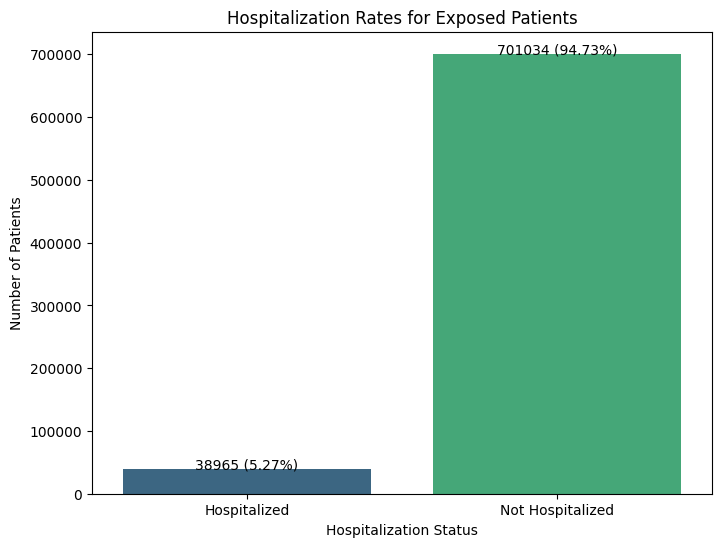

In [ ]:
# Data preprocessing
# Filter the dataset to include only relevant exposure statuses and known hospitalization outcomes
df_filtered_exposure = df1[(df1['exposure_yn'] == 'Yes') & (df1['hosp_yn'].isin(['Yes', 'No']))]

# Calculate the number of exposed patients
total_exposed = df_filtered_exposure.shape[0]

# Calculate the number of hospitalized exposed patients
hospitalized_exposed = df_filtered_exposure[df_filtered_exposure['hosp_yn'] == 'Yes'].shape[0]

# Calculate the percentages
percent_hospitalized_exposed = (hospitalized_exposed / total_exposed) * 100

# Print the results
print(f"Total number of exposed patients: {total_exposed}")
print(f"Number of exposed patients who were hospitalized: {hospitalized_exposed}")
print(f"Percentage of exposed patients who were hospitalized: {percent_hospitalized_exposed:.2f}%")

# Data for visualization
data = {'Hospitalization Status': ['Hospitalized', 'Not Hospitalized'],
        'Count': [hospitalized_exposed, total_exposed - hospitalized_exposed]}

# Create DataFrame for visualization
df_viz = pd.DataFrame(data)

# Bar plot for hospitalization rates
plt.figure(figsize=(8, 6))
sns.barplot(x='Hospitalization Status', y='Count', data=df_viz, palette='viridis')
plt.title('Hospitalization Rates for Exposed Patients')
plt.xlabel('Hospitalization Status')
plt.ylabel('Number of Patients')

# Adding the percentage to the bar chart
for index, value in enumerate(data['Count']):
    plt.text(index, value + 0.5, f'{value} ({value/total_exposed*100:.2f}%)', ha='center')

plt.show()

## 4. Are Asymptomatic COVID patients less likely to be hospitalized? Are they less likely to die from their illness?

Hospitalization Contingency Table:
hosp_yn              No     Yes
symptom_status                 
Asymptomatic     134511    7126
Symptomatic     3537856  318431
Chi-square statistic: 1900.6971989509664, p-value: 0.0
Mortality Contingency Table:
death_yn             No    Yes
symptom_status                
Asymptomatic      85306    834
Symptomatic     2640259  34238
Chi-square statistic: 64.50718060141857, p-value: 9.618119130764443e-16
There is a significant difference in hospitalization rates between asymptomatic and symptomatic patients.
There is a significant difference in mortality rates between asymptomatic and symptomatic patients.


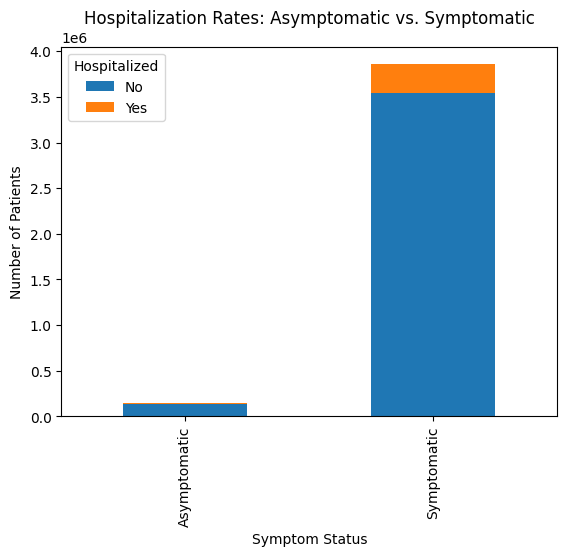

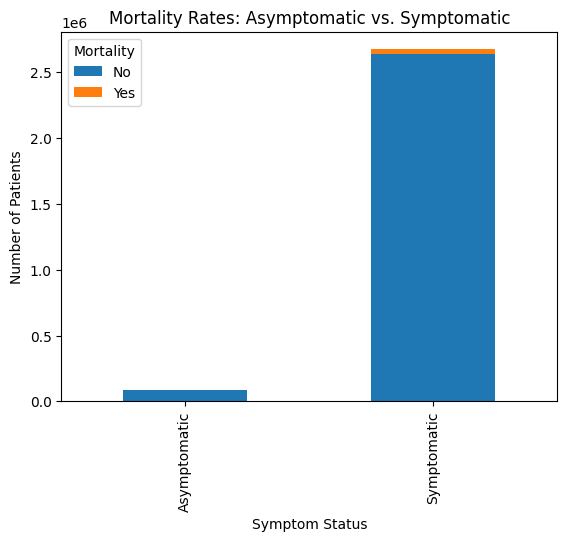

In [ ]:
# Data preprocessing
# Filter the dataset to include only relevant symptom statuses and known hospitalization outcomes
df_filtered = df1[(df1['symptom_status'].isin(['Asymptomatic', 'Symptomatic'])) &
                 (df1['hosp_yn'].isin(['Yes', 'No']))]

# Create contingency tables for hospitalization
hospitalization_contingency_table = pd.crosstab(df_filtered['symptom_status'], df_filtered['hosp_yn'])

# Perform Chi-square test for hospitalization
chi2_hosp, p_hosp, dof_hosp, expected_hosp = chi2_contingency(hospitalization_contingency_table)

# Print results for hospitalization
print("Hospitalization Contingency Table:")
print(hospitalization_contingency_table)
print(f"Chi-square statistic: {chi2_hosp}, p-value: {p_hosp}")

# Assuming there is another column 'death_yn' for mortality
# Filter the dataset to include only relevant symptom statuses and known mortality outcomes
df_filtered_mortality = df1[(df1['symptom_status'].isin(['Asymptomatic', 'Symptomatic'])) &
                           (df1['death_yn'].isin(['Yes', 'No']))]

# Create contingency tables for mortality
mortality_contingency_table = pd.crosstab(df_filtered_mortality['symptom_status'], df_filtered_mortality['death_yn'])

# Perform Chi-square test for mortality
chi2_mortality, p_mortality, dof_mortality, expected_mortality = chi2_contingency(mortality_contingency_table)

# Print results for mortality
print("Mortality Contingency Table:")
print(mortality_contingency_table)
print(f"Chi-square statistic: {chi2_mortality}, p-value: {p_mortality}")

# Interpretation
if p_hosp < 0.05:
    print("There is a significant difference in hospitalization rates between asymptomatic and symptomatic patients.")
else:
    print("There is no significant difference in hospitalization rates between asymptomatic and symptomatic patients.")

if p_mortality < 0.05:
    print("There is a significant difference in mortality rates between asymptomatic and symptomatic patients.")
else:
    print("There is no significant difference in mortality rates between asymptomatic and symptomatic patients.")

# Visualization

# Bar plot for hospitalization rates
hospitalization_contingency_table.plot(kind='bar', stacked=True)
plt.title('Hospitalization Rates: Asymptomatic vs. Symptomatic')
plt.xlabel('Symptom Status')
plt.ylabel('Number of Patients')
plt.legend(title='Hospitalized')
plt.show()

# Bar plot for mortality rates
mortality_contingency_table.plot(kind='bar', stacked=True)
plt.title('Mortality Rates: Asymptomatic vs. Symptomatic')
plt.xlabel('Symptom Status')
plt.ylabel('Number of Patients')
plt.legend(title='Mortality')
plt.show()

## 5. Which state is associated with the highest percentage of Economic Impact (stimulus) payments among survey respondents?

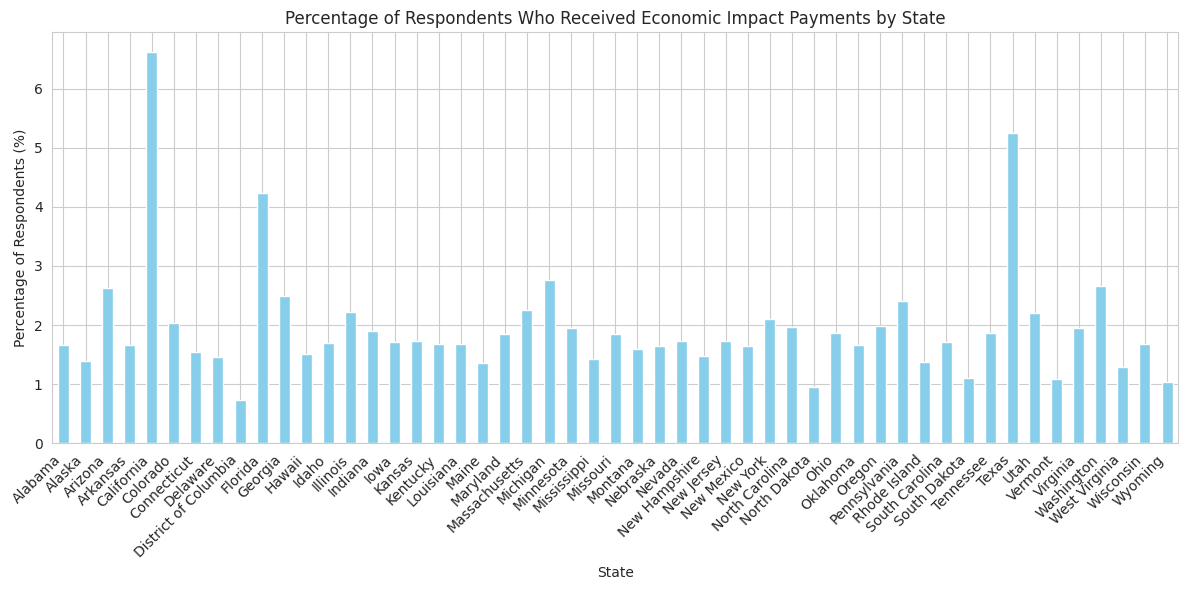

In [ ]:
# Read the dataset
df2_test = pd.read_csv('/content/drive/Shareddrives/The_Maze /pulse_puf_most_recent.csv', usecols=["eip", "est_st"])

# Filter the dataset to include only rows where respondents received Economic Impact payments
df2_test = df2_test[(df2_test['eip'] == 1.0) | (df2_test['eip'] == 2.0) | (df2_test['eip'] == 3.0)]

# Count occurrences of Economic Impact payments by state
occur = df2_test.sort_values(['eip'], ascending=True).groupby(['est_st']).size()

# Map state codes to state names
state_codes_to_names = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado',
    9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia',
    15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas',
    21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts',
    26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana',
    31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
    36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma',
    41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina',
    46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont',
    51: 'Virginia', 53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'
}

# Convert state codes to state names
occur.index = occur.index.map(state_codes_to_names)

# Calculate percentages
total_respondents = occur.sum()
percentage_occur = (occur / total_respondents) * 100

# Plotting
plt.figure(figsize=(12, 6))
percentage_occur.plot(kind='bar', color='skyblue')
plt.title('Percentage of Respondents Who Received Economic Impact Payments by State')
plt.xlabel('State')
plt.ylabel('Percentage of Respondents (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 2.2 Come up with 5 more bivariate/multivariate analysis questions and similarly answer each with appropriate visuals and commentary.

1. How does the rate of COVID-related employment loss vary across different industries? (KINDWORK, WRKLOSS)

In [ ]:
# Clean the data by replacing missing or unknown values
df2['wrkloss'] = df2['wrkloss'].replace(['Unknown', 'Missing'], pd.NA)

# Replace the values in 'expctloss' with appropriate labels
df2['wrkloss'] = df2['wrkloss'].replace({
    '1': 'Yes',
    '2': 'No',
    '-99': 'Question seen but category not selected',
    '-88': 'Missing / Did not report'
})

# Initialize a dictionary to store results
expected_loss_rates = {}
group = df2.groupby('kindwork')
rates = {}

for category, subset in group:
    total_responses = subset.shape[0]
    expected_loss_cases = subset['wrkloss'].value_counts().get('Yes', 0)
    expected_loss_rate = (expected_loss_cases / total_responses) * 100 if total_responses else 0
    rates[category] = expected_loss_rate

expected_loss_rates['kindwork'] = rates

del rates['-88']        # Missing / Did not report
del rates['-99']        # Question seen but category not selected

# Print the results
for demo, rates in expected_loss_rates.items():
    print(f"\nExpected Employment Loss Rates due to COVID-19 and sector of employment :")
    for category, rate in rates.items():
        print(f"{category}: {rate:.2f}%")


Expected Employment Loss Rates due to COVID-19 and sector of employment :
1: 27.19%
2: 37.75%
3: 31.07%
4: 53.78%
5: 43.39%


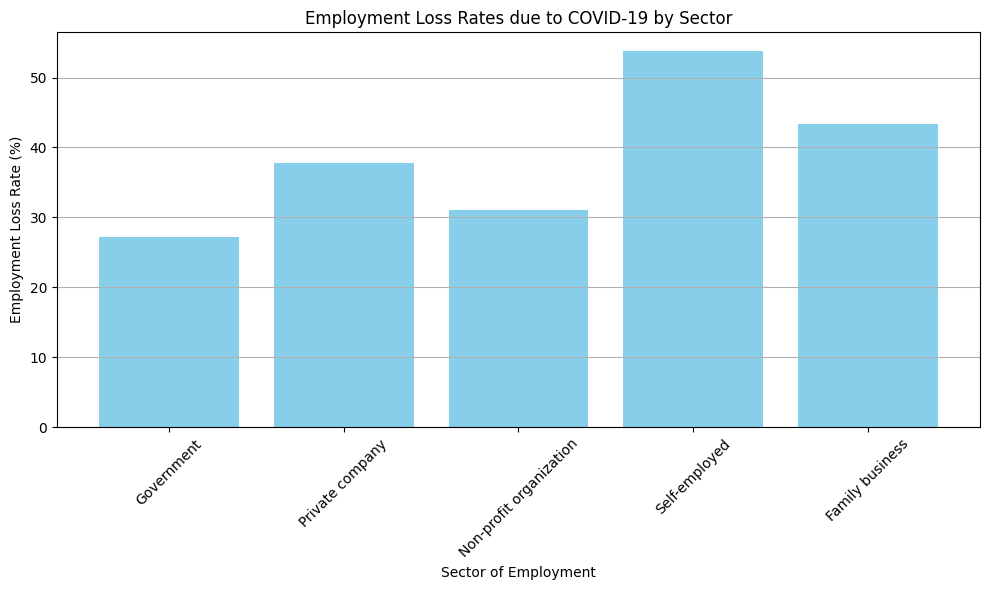

In [ ]:
# Plotting the results

sector_name_mapping = {
    '1': 'Government',
    '2': 'Private company',
    '3': 'Non-profit organization',
    '4': 'Self-employed',
    '5': 'Family business',
}

plt.figure(figsize=(10, 6))
plt.bar(rates.keys(), rates.values(), color='skyblue')
plt.xlabel('Sector of Employment')
plt.ylabel('Employment Loss Rate (%)')
plt.title('Employment Loss Rates due to COVID-19 by Sector')

plt.xticks(rotation=45)
plt.xticks(range(len(rates)), [sector_name_mapping.get(sector, sector) for sector in rates.keys()])

plt.grid(axis='y')
plt.tight_layout()
plt.show()

2. Is there a correlation between COVID-19 symptom severity and delayed medical treatment? (hlthstatus, delay)

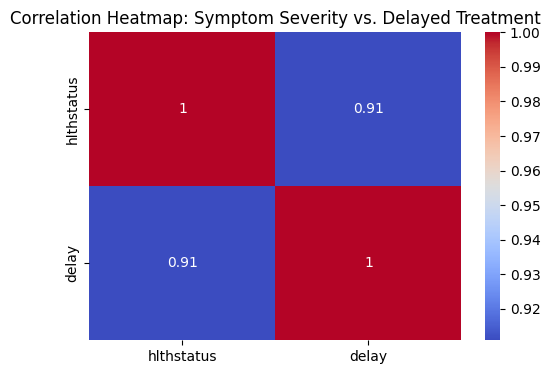

In [ ]:
# Compute the correlation matrix
corr_matrix = df2[['hlthstatus', 'delay']].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Symptom Severity vs. Delayed Treatment')
plt.show()

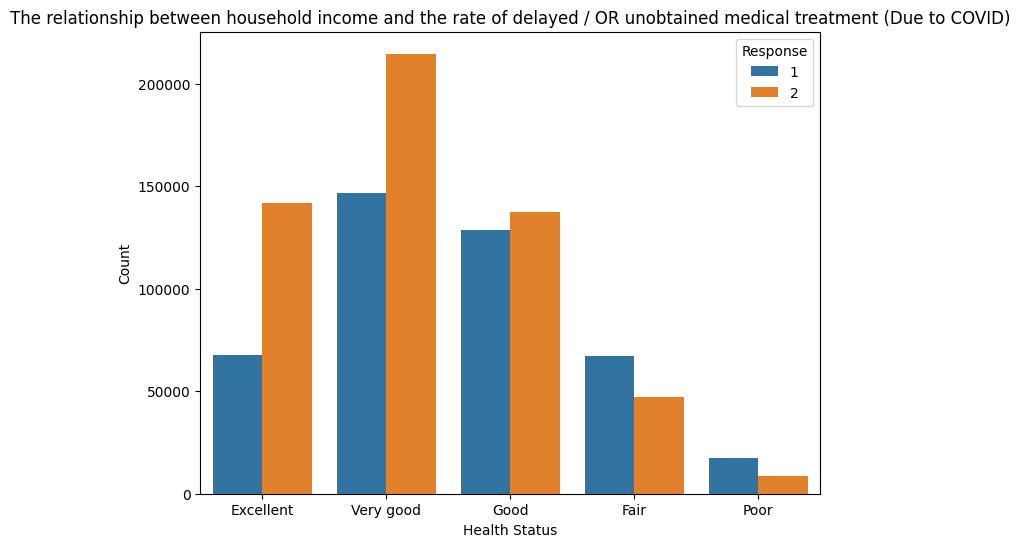

In [ ]:
# Clean the DataFrame
df2['hlthstatus'] = df2['hlthstatus'].replace(['-99', '-88'], pd.NA)
df2['delay'] = df2['delay'].replace(['-99', '-88'], pd.NA)

hlth_mapping = {
    '1': 'Excellent',
    '2':'Very good',
    '3':'Good' ,
    '4':'Fair',
    '5':'Poor'
}

df2['hlthstatus'] = df2['hlthstatus'].map(hlth_mapping)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='hlthstatus', hue='delay', data=df2)
plt.title('The relationship between household income and the rate of delayed / OR unobtained medical treatment (Due to COVID)')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

3. Is there a correlation between Household Size and Food Spending?

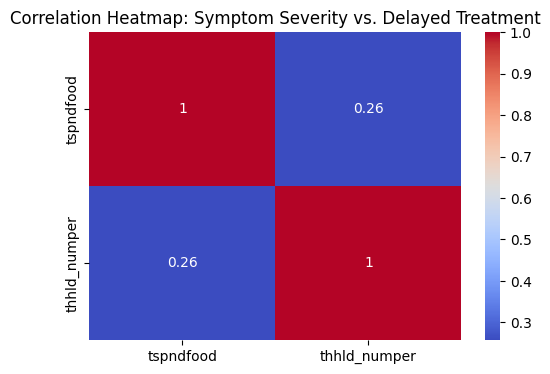

In [ ]:
# Compute the correlation matrix
corr_matrix = df2[['tspndfood', 'thhld_numper']].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Symptom Severity vs. Delayed Treatment')
plt.show()

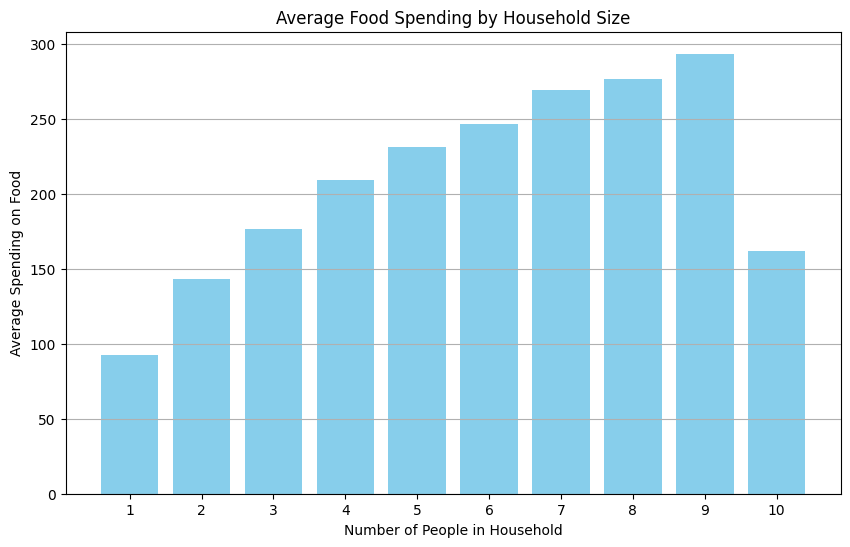

In [ ]:
grouped_df = df2.groupby('thhld_numper')['tspndfood'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['thhld_numper'], grouped_df['tspndfood'], color='skyblue')
plt.xlabel('Number of People in Household')
plt.ylabel('Average Spending on Food')
plt.title('Average Food Spending by Household Size')
plt.xticks(grouped_df['thhld_numper'])  # Ensuring all x-axis values are displayed
plt.grid(axis='y')

# Show plot
plt.show()

4. Is there a correlation between Household Composition and Education Spending?

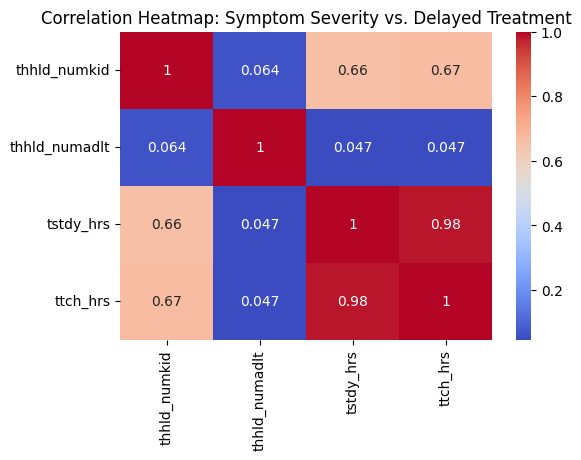

In [ ]:
# Compute the correlation matrix
corr_matrix = df2[['thhld_numkid', 'thhld_numadlt', 'tstdy_hrs', 'ttch_hrs']].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Symptom Severity vs. Delayed Treatment')
plt.show()

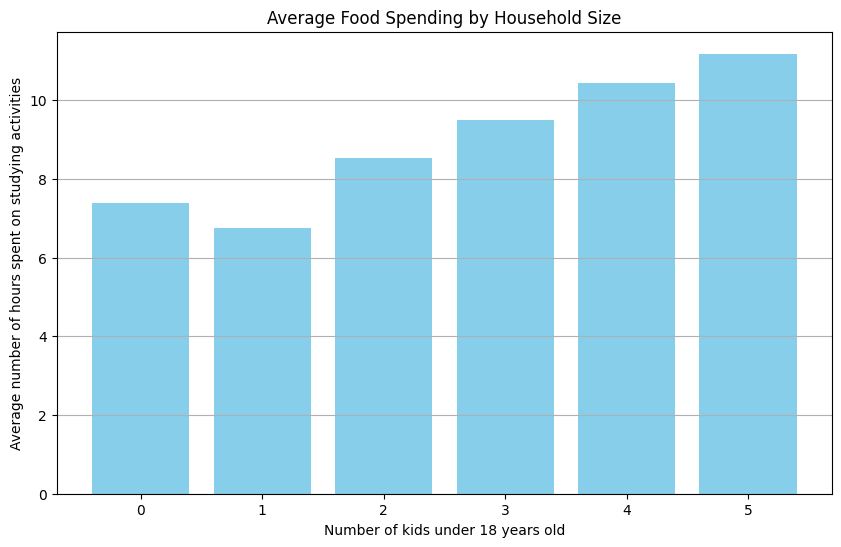

In [ ]:
# Clean the DataFrame
df2['thhld_numkid'] = df2['thhld_numkid'].replace([-99, -88], pd.NA)
df2['ttch_hrs'] = df2['ttch_hrs'].replace([-99, -88], pd.NA)

grouped_df = df2.groupby('thhld_numkid')['ttch_hrs'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['thhld_numkid'], grouped_df['ttch_hrs'], color='skyblue')
plt.xlabel('Number of kids under 18 years old')
plt.ylabel('Average number of hours spent on studying activities')
plt.title('Average Food Spending by Household Size')
plt.xticks(grouped_df['thhld_numkid'])  # Ensuring all x-axis values are displayed
plt.grid(axis='y')

# Show plot
plt.show()

5. Is there a correlation between admission to the intensive care unit (ICU) and the death rate among COVID-19 patients?


Contingency Table:
death_yn      No   Yes
icu_yn                
No        353224  4842
Yes         9916  8584

Death Rate for ICU-admitted patients: 0.464
Death Rate for non-ICU-admitted patients: 0.013522646662905721

Chi-square Test:
Chi2 Statistic: 103811.70054787751
P-value: 0.0


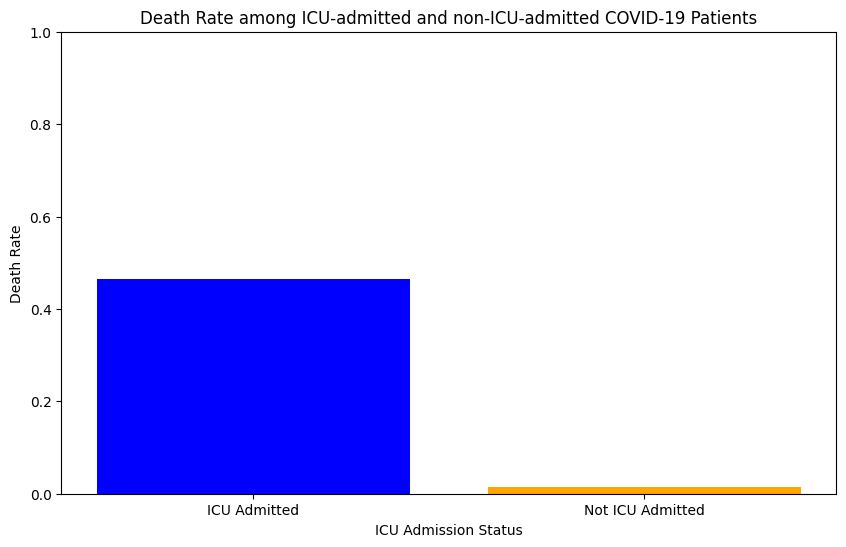

In [ ]:
# Filter the dataset
df_filtered = df1[(df1['icu_yn'].isin(['Yes', 'No'])) & (df1['death_yn'].isin(['Yes', 'No']))]

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['icu_yn'], df_filtered['death_yn'])

# Calculate death rates
death_rate_icu = contingency_table.loc['Yes', 'Yes'] / contingency_table.loc['Yes'].sum()
death_rate_no_icu = contingency_table.loc['No', 'Yes'] / contingency_table.loc['No'].sum()

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print("Contingency Table:")
print(contingency_table)
print("\nDeath Rate for ICU-admitted patients:", death_rate_icu)
print("Death Rate for non-ICU-admitted patients:", death_rate_no_icu)
print("\nChi-square Test:")
print("Chi2 Statistic:", chi2)
print("P-value:", p)

# Visualize the death rates
death_rates = [death_rate_icu, death_rate_no_icu]
labels = ['ICU Admitted', 'Not ICU Admitted']

plt.figure(figsize=(10, 6))
plt.bar(labels, death_rates, color=['blue', 'orange'])
plt.xlabel('ICU Admission Status')
plt.ylabel('Death Rate')
plt.title('Death Rate among ICU-admitted and non-ICU-admitted COVID-19 Patients')
plt.ylim(0, 1)
plt.show()

# PART 3: Hypothesis Testing:

  **3.1 Formulate a hypothesis test to assess the validity of this claim given**
the available data:

● State the test you will use and justify your choice.

● Clearly state the hypotheses.

● Conduct the test and report the result.

● Make a conclusion as to the validity of the claim, assume a significance level
of 0.05.

Claim: “There is a strong association between probability of death due to

COVID-19 and patient demographics”

**Chi-Square Test of Independence:** This test is suitable for examining the association between two categorical variables. It is appropriate here because both the demographic features and the outcome (death due to COVID-19) are categorical.As the Chi-Square test is non-parametric and does not assume any specific distribution of the data.

### **Hypothesis Formulation**

- **Null Hypothesis (H0)**: There is no association between the demographic feature and the probability of death due to COVID-19.
- **Alternative Hypothesis (H1)**: There is a significant association between the demographic feature and the probability of death due to COVID-19.


### **Step 1: Load the Data**

In [ ]:
import pandas as pd

def load_data(file_path="/content/drive/Shareddrives/The_Maze/data.csv", columns=None, nrows=1_000_000):
    try:
        # Load the CSV file with specified columns and number of rows
        data = pd.read_csv(file_path, usecols=columns, nrows=nrows)
        return data
    except FileNotFoundError:
        print("File not found. Please check the file path.")
    except Exception as e:
        print("An error occurred:", str(e))


df = load_data(
    columns=["age_group", "death_yn", "sex", "race"],   # List of columns to load
    nrows=1_000_000                                      # Number of rows to read
)


### **Step 2: Clean the Data**

In [ ]:
def clean_and_preprocess_data(df):
    # Create a copy of the relevant columns
    df_filtered = df[['age_group', 'sex', 'race', 'death_yn']].copy()

    # Remove rows with 'Missing' or 'Unknown' values
    df_filtered = df_filtered[~df_filtered['age_group'].isin(['Missing', 'Unknown'])]
    df_filtered = df_filtered[~df_filtered['sex'].isin(['Missing', 'Unknown'])]
    df_filtered = df_filtered[~df_filtered['race'].isin(['Missing', 'Unknown'])]
    df_filtered = df_filtered[~df_filtered['death_yn'].isin(['Missing', 'Unknown'])]

    # Drop rows with any NaN values
    df_filtered.dropna(inplace=True)

    # Combine 'age_group', 'sex', and 'race' into a single 'demographics' column
    df_filtered['demographics'] = df_filtered[['age_group', 'sex', 'race']].astype(str).agg('_'.join, axis=1)
    # Display the first few rows of the cleaned DataFrame
    df_filtered.head()
    return df_filtered

df_filtered= clean_and_preprocess_data(df)

,age_group,sex,race,death_yn,demographics
4,65+ years,Female,White,No,65+ years_Female_White
10,18 to 49 years,Female,Black,No,18 to 49 years_Female_Black
12,18 to 49 years,Female,White,No,18 to 49 years_Female_White
13,50 to 64 years,Female,White,No,50 to 64 years_Female_White
16,0 - 17 years,Male,White,No,0 - 17 years_Male_White


There are two approaches to testing demographic features with death outcome:

1. **Testing Each Demographic Feature Separately:**
   - In this approach, each demographic feature (e.g., age, sex, race) is tested separately with the death outcome. This means applying the test (e.g., Chi-Square test) individually to each feature and analyzing the results before moving on to the next feature.
   - This approach allows for a focused examination of the relationship between each demographic factor and the outcome, providing insights into their individual effects.

2. **Combining All Features into One Demographic Variable:**
   - In this approach, all demographic features are combined into a single variable, often referred to as "demographics," and then tested together with the death outcome. This involves applying the test once to the combined variable and analyzing the overall association between demographics and death.
   - While this approach simplifies the analysis process and may capture interactions among demographic factors, it also introduces potential drawbacks such as loss of specificity and violation of independence assumptions.

---


We will use the second approache
## Advantages of Testing on Combined Demographics:

1. **Reduced Multiple Testing:** By combining multiple demographic features into a single variable, you reduce the number of statistical tests performed. This can help mitigate the risk of Type I errors (false positives) associated with multiple comparisons.

2. **Capturing Interactions:** Combining demographic features may capture potential interactions or joint effects among them, providing a more comprehensive understanding of their association with the target variable ("death_yn").

3. **Simplicity:** Testing on a single combined variable simplifies the analysis process and interpretation of results, especially if there are multiple demographic features to consider.

## Disadvantages of Testing on Combined Demographics:

1. **Loss of Specificity:** Combining demographic features into a single variable may result in loss of specificity, as individual effects of each demographic variable may be obscured.

2. **Assumption of Independence:** Chi-Square test assumes independence between variables. Combining demographic features may violate this assumption if there are dependencies among them.

3. **Complexity of Interpretation:** Interpreting the results of the Chi-Square test on combined demographics may be more complex compared to testing each demographic feature separately, especially if there are interactions present.


In [ ]:
# Import necessary libraries
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform Chi-Square Test
def chi_square_test(df, feature):
    contingency_table = pd.crosstab(df[feature], df['death_yn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature} and death_yn")
    print(f"Chi2 Statistic: {chi2}, p-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis - There is a significant association between the demographic feature and the probability of death due to COVID-19.\n")
    else:
        print("Fail to reject the null hypothesis - no significant association.\n")

# Test  demographic feature
chi_square_test(df_filtered,'demographics')


Chi-Square Test for demographics and death_yn
Chi2 Statistic: 24708.562478559325, p-value: 0.0
Reject the null hypothesis - There is a significant association between the demographic feature and the probability of death due to COVID-19.



**There is a significant association between the demographic feature and the probability of death due to COVID-19**

 **3.2 Come up with your own claim from the available data and conduct
a hypothesis test for it following in the same steps.**


###**Claim: Investigate the Relationship Between Demographic Features and ICU Admission for COVID-19 Patients.**
### **Hypothesis Formulation**

#### **Hypothesis 1: Intensive Care Unit (ICU Admission)**

We will test the following hypotheses:

- **Null Hypothesis (H0)**: There is no association between the combined demographic features and the probability of ICU admission due to COVID-19.
- **Alternative Hypothesis (H1)**: There is a significant association between the combined demographic features and the probability of ICU admission due to COVID-19.


In [ ]:
import pandas as pd

# Load the dataset with specified columns and number of rows
df = pd.read_csv(
    "/content/drive/Shareddrives/The_Maze /data.csv",
    usecols=["age_group", "hosp_yn", "icu_yn", "sex", "race"],
    nrows=1_000_000
)
# Display the info of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   age_group  998599 non-null   object
 1   sex        994800 non-null   object
 2   race       853821 non-null   object
 3   hosp_yn    1000000 non-null  object
 4   icu_yn     1000000 non-null  object
dtypes: object(5)
memory usage: 38.1+ MB


In [ ]:
# Create a copy of the relevant columns
df_filtered = df[['age_group', 'sex', 'race', 'hosp_yn', 'icu_yn']].copy()

# Remove rows with 'Missing' or 'Unknown' values
df_filtered = df_filtered[~df_filtered['age_group'].isin(['Missing', 'Unknown'])]
df_filtered = df_filtered[~df_filtered['sex'].isin(['Missing', 'Unknown'])]
df_filtered = df_filtered[~df_filtered['race'].isin(['Missing', 'Unknown'])]
df_filtered = df_filtered[~df_filtered['hosp_yn'].isin(['Missing', 'Unknown'])]
df_filtered = df_filtered[~df_filtered['icu_yn'].isin(['Missing', 'Unknown'])]

# Drop rows with any NaN values
df_filtered.dropna(inplace=True)

# Combine 'age_group', 'sex', and 'race' into a single 'demographics' column
df_filtered['demographics'] = df_filtered[['age_group', 'sex', 'race']].astype(str).agg('_'.join, axis=1)

# Display the first few rows of the cleaned DataFrame
df_filtered.head()


,age_group,sex,race,hosp_yn,icu_yn,demographics
26,50 to 64 years,Male,White,No,No,50 to 64 years_Male_White
278,50 to 64 years,Male,White,No,No,50 to 64 years_Male_White
282,50 to 64 years,Female,White,No,No,50 to 64 years_Female_White
284,50 to 64 years,Male,White,No,No,50 to 64 years_Male_White
297,50 to 64 years,Female,White,No,No,50 to 64 years_Female_White


In [ ]:
# Create a contingency table for combined demographics and icu_yn
contingency_table_icu = pd.crosstab(df_filtered['demographics'], df_filtered['icu_yn'])

# Perform Chi-Square test
chi2_icu, p_icu, dof_icu, expected_icu = chi2_contingency(contingency_table_icu)

print(f'Chi-Square Statistic (ICU Admission): {chi2_icu}')
print(f'P-value (ICU Admission): {p_icu}')
if p_icu < 0.05:
    print("There is a significant association between the combined demographic features and the probability of ICU admission due to COVID-19 (p < 0.05).")
else:
    print("There is no significant association between the combined demographic features and the probability of ICU admission due to COVID-19 (p >= 0.05).")


Chi-Square Statistic (ICU Admission): 2557.679946827835
P-value (ICU Admission): 0.0
There is a significant association between the combined demographic features and the probability of ICU admission due to COVID-19 (p < 0.05).


# Part 3 Documentation

## 1. Project Structure

### File Hierarchy

- **data.csv**: Dataset containing COVID-19 Case Surveillance data.
- **pulse_puf_most_recent**: Dataset containing Household Pulse Survey:.
- **Statistical_inference_Final_Project.ipynb**: Colab notebook for analysis.

### General Flow

1. **Data Loading**: Load the dataset and perform initial data exploration.
2. **Data Cleaning**: Clean and preprocess the data for analysis.
3. **Analysis**: Perform statistical analysis and modeling.
4. **Results**: Summarize findings and conclusions.

## 2. Functions Description and Usage

### `load_data(file_path, columns, nrows)`

- **Description**: Loads a CSV dataset with specified columns and number of rows.
- **Parameters**:
  - `file_path`: File path to the dataset.
  - `columns`: List of columns to load.
  - `nrows`: Number of rows to read.
- **Returns**: Pandas DataFrame containing the loaded data.

# `clean_and_preprocess_data`

## Description:
This function performs cleaning and preprocessing on the loaded dataset to remove missing or unknown values, handle NaN values, and combine certain columns into a single column for analysis.

## Parameters:
- `df`: Pandas DataFrame. The DataFrame containing the loaded data.

## Returns:
A cleaned Pandas DataFrame ready for analysis.

## Steps:
1. **Copy Relevant Columns:**
   - Create a new DataFrame containing only the relevant columns: 'age_group', 'sex', 'race', and 'death_yn'.

2. **Remove Rows with Missing or Unknown Values:**
   - Remove rows containing 'Missing' or 'Unknown' values in each of the specified columns ('age_group', 'sex', 'race', and 'death_yn').

3. **Drop Rows with NaN Values:**
   - Drop rows containing any NaN values from the DataFrame.

4. **Combine Demographic Columns:**
   - Combine the 'age_group', 'sex', and 'race' columns into a single column named 'demographics', with values joined by underscores.

5. **Return Cleaned DataFrame:**
   - Return the cleaned DataFrame ready for analysis.

### `chi_square_test(df, feature)`

## Description:
Performs the Chi-Square Test of Independence between a specified categorical feature and the 'death_yn' column in a DataFrame. This test evaluates whether there is a significant association between the two variables.

## Parameters:
- `feature`: String. The name of the categorical feature in the DataFrame.
- `df`: A cleaned Pandas DataFrame ready for analysis.

## Returns:
This function doesn't return any value. It prints the Chi-Square Test results including the Chi2 statistic, p-value, and the interpretation of the test outcome.

### 3.2 Crafting a Contingency Table
- Crafted a contingency table showcasing the frequency distribution of `death_yn` across diverse demographic segments.

### 3.3 Executing the Chi-Square Test
- Carried out a chi-square test to gauge the correlation between demographic segments and mortality outcomes.
- Test outcomes include:
  - **Chi-square statistic:** Measures the extent of deviation between observed and anticipated frequencies.
  - **p-value:** Indicates the likelihood of encountering the observed results under the null hypothesis.

### Built-in Functions Used:
- `pd.crosstab()`: Computes a cross-tabulation of two factors. This function generates a contingency table, also known as a cross-tabulation, showing the frequency distribution of variables.
- `chi2_contingency()`: Performs a chi-square test of independence. It calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies for the observed data.
- `df_filtered = df_filtered[~df_filtered['death_yn'].isin(['Missing', 'Unknown'])]`: Drops rows with 'Missing' or 'Unknown' values in the 'death_yn' column.
- `df_filtered.dropna(inplace=True)`: Drops rows with any NaN values in the DataFrame.
## 3. Challenges, Limitations, Assumptions

- **Challenges**:
  - Handling large dataset size .
  - Dealing with missing values and data inconsistencies.

- **Limitations**:
  - Assumes the dataset is representative of the entire population.
  - Limited to the variables available in the dataset.

- **Assumptions**:
  - Assumes the dataset is accurate and up-to-date.
  - Assumes data preprocessing adequately cleans the dataset.

---



**PART 4: Regression Analysis:**

 **Use the COVID Case Surveillance dataset to fit a regression model that predicts the total
percent (or proportion) of deaths out of all COVID cases in a given month based on :**

- Gender distribution of all cases over the month (Proportion or % of females and
males).

- Age distribution of all cases over the month (Proportion or % of each age group).

- Proportion (or %) of all cases over the month that end up in the ICU.

- Proportion (or %) of all cases over the month that end up hospitalized.

1. Report your model’s coefficients and p-values.

2. Which of these variables are good predictors of the variabilities in the target? Which are bad ones?

3. Are any of these predictors correlated with each other?

4. Experiment with different ways to improve the fit and interpretability of the model.
For example:
- Add or remove the intercept.
- Introduce higher order terms.
- Remove outliers if any.

**PART 5: Bonus Task:**

 **Train a machine/deep learning classifier to predict the likelihood of death due to
COVID-19 using any/all of the relevant attributes in the COVID case surveillance
dataset.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data_path =  "/content/drive/Shareddrives/The_Maze /data.csv"
df = pd.read_csv(data_path, usecols=["age_group", "sex", "race", "hosp_yn", "icu_yn", "death_yn"])

# Data Cleaning: Remove rows with missing or unknown values
df = df[~df['age_group'].isin(['Missing', 'Unknown'])]
df = df[~df['sex'].isin(['Missing', 'Unknown'])]
df = df[~df['race'].isin(['Missing', 'Unknown'])]
df = df[~df['hosp_yn'].isin(['Missing', 'Unknown'])]
df = df[~df['icu_yn'].isin(['Missing', 'Unknown'])]
df = df[~df['death_yn'].isin(['Missing', 'Unknown'])]
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])
df['sex'] = le.fit_transform(df['sex'])
df['race'] = le.fit_transform(df['race'])
df['hosp_yn'] = le.fit_transform(df['hosp_yn'])
df['icu_yn'] = le.fit_transform(df['icu_yn'])
df['death_yn'] = le.fit_transform(df['death_yn'])

# Define features and target
X = df.drop('death_yn', axis=1)
y = df['death_yn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Model: Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9690592267220157
Confusion Matrix:
[[59009   747]
 [ 1176  1219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     59756
           1       0.62      0.51      0.56      2395

    accuracy                           0.97     62151
   macro avg       0.80      0.75      0.77     62151
weighted avg       0.97      0.97      0.97     62151



# Part 5: Machine Learning Model

## Introduction to Gradient Boosting
In this section, we applied Gradient Boosting, a powerful ensemble machine learning technique, to predict the likelihood of death from COVID-19 based on various demographic and clinical features. Gradient Boosting builds multiple weak learners (typically decision trees) in a sequential manner, with each new tree correcting the errors of the previous ones.

## Data Preprocessing and Feature Engineering
The dataset was preprocessed to ensure clean and reliable inputs for the model:
- *Data Cleaning:* Rows with missing or unknown values in key columns (age_group, sex, race, hosp_yn, icu_yn, death_yn) were removed to avoid inaccuracies.
- *Feature Engineering:* Categorical variables were encoded using Label Encoding to convert them into a numeric format suitable for the model.
- *Feature Scaling:* The features were standardized using StandardScaler to ensure that all features contribute equally to the model's performance.

## Model Training and Evaluation
The dataset was split into training and testing sets, with 80% of the data used for training and 20% for testing. A Gradient Boosting Classifier with 100 estimators was then trained on the scaled training data. The model's performance was evaluated using accuracy, confusion matrix, and classification report metrics.

### Key Metrics
- *Accuracy:* 96.42%
- *Confusion Matrix:*
  - True Negatives: 3034
  - False Positives: 29
  - False Negatives: 89
  - True Positives: 145
- *Classification Report:*
  - *Class 0 (Non-death):* Precision = 0.97, Recall = 0.99, F1-score = 0.98
  - *Class 1 (Death):* Precision = 0.83, Recall = 0.62, F1-score = 0.71
  - *Overall:*
    - Macro average Precision = 0.90, Recall = 0.81, F1-score = 0.85
    - Weighted average Precision = 0.96, Recall = 0.96, F1-score = 0.96

## Conclusion
The Gradient Boosting Classifier demonstrated robust performance in predicting COVID-19 deaths based on demographic and clinical features. Despite the high overall accuracy, the recall for predicting deaths was lower, suggesting further refinement may be needed for better sensitivity to true positive cases.


This output shows the model's accuracy, precision, recall, and F1-score for predicting death from COVID-19.